**Notebook Overview**

Hello, All! I am herewith presenting my new notebook **which I tailored around a self-devised theme – 'How a data analyst sees the Israeli-Palestinian conflicts'.**

A few days ago while browsing for a new dataset for my next notebook project, **I stumbled upon [this beautiful dataset](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian)**, which has a nicely compiled statistical account of conflicts occurring in Israel and Palestine since the year 2000.

**Intrigued by the quality of the dataset, I decided to make a notebook out of the dataset.**

**The 'Israeli_Palestinian_Conflicts |Data Analyst's View' notebook aims to analyse events and fatalities by**

- *Year, month, and day of the month of events that led to fatalities*
- *Victim profiles such as age, gender, citizenship, participation in hostilities etc*
- *Event locations, location districts, and location regions*
- *Type of injury, type of ammunition, and party responsible for killings, among others.*

Analysis is made using a diverse range of plots including pie charts, histograms, scatterplots, line graphs, bar charts (vertical, horizontal, stacked, and clustered], and violin plots, among others.

**I hope you will enjoy the notebook theme, the contents in it, and the DataViz formats.**

**So let's get started and delve into our notebook.**

In [1]:
## Import the relevant libraries into the environment
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MASTER/M2.859 - Visualización de datos/PRA2/M2.859-Visualizacion-de-datos-PRA2/fatalities_isr_pse_conflict_2000_to_2023.csv')
## Check a few records in the dataset that we just loaded
data.head(5)

name date_of_event   age  \
0  'Abd a-Rahman Suleiman Muhammad Abu Daghash    2023-09-24 32.00   
1         Usayed Farhan Muhammad 'Ali Abu 'Ali    2023-09-24 21.00   
2             'Abdallah 'Imad Sa'ed Abu Hassan    2023-09-22 16.00   
3             Durgham Muhammad Yihya al-Akhras    2023-09-20 19.00   
4                 Raafat 'Omar Ahmad Khamaisah    2023-09-19 15.00   

   citizenship     event_location event_location_district  \
0  Palestinian     Nur Shams R.C.                 Tulkarm   
1  Palestinian     Nur Shams R.C.                 Tulkarm   
2  Palestinian           Kfar Dan                   Jenin   
3  Palestinian  'Aqbat Jaber R.C.                 Jericho   
4  Palestinian         Jenin R.C.                   Jenin   

  event_location_region date_of_death gender took_part_in_the_hostilities  \
0             West Bank    2023-09-24      M                          NaN   
1             West Bank    2023-09-24      M                          NaN   
2             West Bank    2023-09-22      M                          NaN   
3             West Bank    2023-09-20      M                          NaN   
4             West Bank    2023-09-19      M                          NaN   

  place_of_residence place_of_residence_district type_of_injury  \
0     Nur Shams R.C.                     Tulkarm        gunfire   
1     Nur Shams R.C.                     Tulkarm        gunfire   
2           al-Yamun                       Jenin        gunfire   
3  'Aqbat Jaber R.C.                     Jericho        gunfire   
4              Jenin                       Jenin        gunfire   

        ammunition                killed_by  \
0  live ammunition  Israeli security forces   
1  live ammunition  Israeli security forces   
2  live ammunition  Israeli security forces   
3  live ammunition  Israeli security forces   
4  live ammunition  Israeli security forces   

                                               notes  
0  Fatally shot by Israeli forces while standing ...  
1  Fatally shot by Israeli forces while trying to...  
2  Fatally shot by soldiers while firing at them ...  
3  Shot in the head by Israeli forces while throw...  
4  Wounded by soldiers’ gunfire after running awa...

In [15]:
# Filtrar por víctimas femeninas
female_victims = data[data['gender'] == 'F']

# Mujeres israelíes en Israel
israeli_victims_in_israel = female_victims[(female_victims['citizenship'] == 'Israeli') &
                                           (female_victims['event_location_region'] == 'Israel')]
common_notes_israeli_victims_in_israel = israeli_victims_in_israel['notes'].value_counts().head(10)

# Mujeres israelíes en Cisjordania
israeli_victims_in_west_bank = female_victims[(female_victims['citizenship'] == 'Israeli') &
                                              (female_victims['event_location_region'] == 'West Bank')]
common_notes_israeli_victims_in_west_bank = israeli_victims_in_west_bank['notes'].value_counts().head(10)

# Mujeres palestinas en Cisjordania
palestinian_victims_in_west_bank = female_victims[(female_victims['citizenship'] == 'Palestinian') &
                                                  (female_victims['event_location_region'] == 'West Bank')]
common_notes_palestinian_victims_in_west_bank = palestinian_victims_in_west_bank['notes'].value_counts().head(10)

# Mujeres en la Franja de Gaza
female_victims_in_gaza = female_victims[female_victims['event_location_region'] == 'Gaza Strip']
common_notes_female_victims_in_gaza = female_victims_in_gaza['notes'].value_counts().head(10)

# Mostrar los resultados con números

print("Mujeres Israelíes en Israel:")
print("Total de Víctimas: ", israeli_victims_in_israel.shape[0])
print(common_notes_israeli_victims_in_israel)

print("\nMujeres Israelíes en Cisjordania:")
print("Total de Víctimas: ", israeli_victims_in_west_bank.shape[0])
print(common_notes_israeli_victims_in_west_bank)

print("\nMujeres Palestinas en Cisjordania:")
print("Total de Víctimas: ", palestinian_victims_in_west_bank.shape[0])
print(common_notes_palestinian_victims_in_west_bank)

print("\nMujeres en la Franja de Gaza:")
print("Total de Víctimas: ", female_victims_in_gaza.shape[0])
print(common_notes_female_victims_in_gaza)



Mujeres Israelíes en Israel:
Total de Víctimas:  237
Killed in a suicide bombing at the entrance to the Dolphinarium dance club.    14
Killed in a suicide bombing in the Park Hotel.                                 13
Killed in a suicide bombing on bus No. 32 near the Pat intersection.           12
Killed in a suicide bombing in the Sbarro restaurant.                          10
Killed in the double suicide bombing on the No .6 and No. 12 buses.            10
Killed in a suicide bus bombing near the Klal building.                        10
Killed in a suicide bombing on bus No. 2 on Samuel Hanavi street.               9
Killed in a suicide bombing in the Shefield Club.                               8
Killed in a suicide bombing on bus No. 20 in Kiryat Menachem.                   8
Killed in a suicide bombing on bus No. 37.                                      8
Name: notes, dtype: int64

Mujeres Israelíes en Cisjordania:
Total de Víctimas:  80
Killed in an attack which included the deto

In [32]:
# Calculating the average age of victims by gender, citizenship, and region


# Israeli victims
israeli_victims = data[data['citizenship'] == 'Israeli']


# Palestinian victims
palestinian_victims = data[data['citizenship'] == 'Palestinian']

# Israeli victims by region
avg_age_israeli_male_by_region = israeli_victims.groupby(['gender', 'event_location_region'])['age'].mean()['M']
avg_age_israeli_female_by_region = israeli_victims.groupby(['gender', 'event_location_region'])['age'].mean()['F']

# Palestinian victims by region
avg_age_palestinian_male_by_region = palestinian_victims.groupby(['gender', 'event_location_region'])['age'].mean()['M']
avg_age_palestinian_female_by_region = palestinian_victims.groupby(['gender', 'event_location_region'])['age'].mean()['F']

avg_age_israeli_male_by_region, avg_age_israeli_female_by_region, avg_age_palestinian_male_by_region, avg_age_palestinian_female_by_region



(event_location_region
 Gaza Strip   25.00
 Israel       39.17
 West Bank    37.02
 Name: age, dtype: float64,
 event_location_region
 Gaza Strip   23.07
 Israel       39.62
 West Bank    34.25
 Name: age, dtype: float64,
 event_location_region
 Gaza Strip   25.81
 Israel       22.60
 West Bank    25.01
 Name: age, dtype: float64,
 event_location_region
 Gaza Strip   27.67
 Israel       14.00
 West Bank    30.11
 Name: age, dtype: float64)

In [16]:
# Convertir la columna 'date_of_death' a datetime y extraer el año
data['date_of_death'] = pd.to_datetime(data['date_of_death'])
data['year'] = data['date_of_death'].dt.year

# Filtrar los datos para los años 2012 a 2014 y agrupar por año y ciudadanía
filtered_data = data[(data['year'] >= 2012) & (data['year'] <= 2014)]
victim_count = filtered_data.groupby(['year', 'citizenship']).size().unstack(fill_value=0)

# Sumar las víctimas para cada ciudadanía en el rango de años
total_victims = victim_count.sum()

print(total_victims)

citizenship
Israeli          65
Jordanian         1
Palestinian    2564
dtype: int64


In [ ]:


# Cargar los cuatro archivos Excel
file_paths = [
    'data.xlsx',
    'data-2.xlsx',
    'data-3.xlsx',
    'data-4.xlsx'
]

# Inicializar un DataFrame vacío para almacenar los totales
total_deaths = pd.DataFrame()

# Leer cada archivo y sumar los muertos en 2006 y 2007
for file_path in file_paths:
    data = pd.read_excel(file_path)
    # Asumiendo que hay una columna que indica el año y otra que indica el número de muertes
    # Ajusta los nombres de las columnas según tu dataset
    yearly_deaths = data.groupby('Year')['Deaths'].sum()
    total_deaths = total_deaths.add(yearly_deaths, fill_value=0)

# Filtrar los totales para los años 2006 y 2007
total_deaths_2006_2007 = total_deaths.loc[[2006, 2007]].sum()

total_deaths_2006_2007


In [4]:
codificaciones = ['latin1', 'ISO-8859-1', 'cp1252']

for codificacion in codificaciones:
    try:
        df_demo = pd.read_csv('/content/drive/MyDrive/MASTER/M2.859 - Visualización de datos/PRA2/M2.859-Visualizacion-de-datos-PRA2/demolitions.csv', encoding=codificacion, sep=';')
        print(f"Archivo leído con éxito usando la codificación {codificacion}")
        break
    except UnicodeDecodeError:
        print(f"Fallo al leer con la codificación {codificacion}")

# Convertir la columna 'Date of Demolition' a datetime
df_demo['Date of Demolition'] = pd.to_datetime(df_demo['Date of Demolition'], format='%d/%m/%y')

# Extraer el año en una nueva columna 'Year'
df_demo['Year'] = df_demo['Date of Demolition'].dt.year

df_demo
df_demo.head()

Archivo leído con éxito usando la codificación latin1


Date of Demolition           Locality District       Area  Housing Units  \
0         2023-12-28            Qabalan   Nablus  west-bank              1   
1         2023-12-28            Qabalan   Nablus  west-bank              1   
2         2023-12-27          al-Jawaya   Hebron  west-bank              2   
3         2023-12-26  Furush Beit Dajan   Nablus  west-bank              1   
4         2023-12-26  Furush Beit Dajan   Nablus  west-bank              1   

   People left Homeless  Minors left Homeless Type Of Sturcture  Year  
0                     0                     0   Non Resedential  2023  
1                     3                     1        Residental  2023  
2                     7                     4        Residental  2023  
3                     7                     4        Residental  2023  
4                     2                     0        Residental  2023

In [5]:
df_demo1=df_demo.groupby('Year',as_index=False).sum()
#extract a new feature called homeless from sum of people left homeless and minors left homeless
df_demo1['Homeless']=df_demo1['People left Homeless']+df_demo1['Minors left Homeless']
df_demo1=df_demo1[['Year','Housing Units','Homeless']]
df_demo1.head(3)

Year  Housing Units  Homeless
0  2006             49       303
1  2007             47       393
2  2008             44       436

In [4]:
from IPython.core.display import HTML
HTML('''<iframe title="Porcentage de demoliciones de vivienda Palestina por distrito" aria-label="map" id="datawrapper-chart-0vw51" src="https://datawrapper.dwcdn.net/0vw51/1/" scrolling="si" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="482"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>''')

In [3]:
import pandas as pd
import plotly.express as px

# Cargando los datos desde el archivo Excel
file_path = 'IsraelTimeline_1999_Onwards.xlsx'
df = pd.read_excel(file_path)

# Convirtiendo 'Year' y 'Event Catergory' a tipos de datos apropiados
df['Year'] = df['Year'].astype(str)
df['Event Catergory'] = df['Event Catergory'].astype('category')

# Creando el gráfico interactivo con el título del evento visible en el gráfico
fig = px.scatter(df, x='Year', y='Event Catergory', color='Event Catergory',
                 hover_data=['Event'], text='Event Title',
                 title='Eventos en Israel desde 1999 por Categoría y Año')

# Ajustando la visualización para que el texto no se superponga
fig.update_traces(textposition='top center')

# Mostrando el gráfico
fig.show()



In [17]:
## Let's get rid of duplicate entries
data.drop_duplicates(keep='first',inplace=True)

## Again check the dataset shape, after removing the duplicate entries
print(f'\033[94mNumber of records/rows & features/columns in the dataset are: {data.shape[0], data.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {data.duplicated().sum()}')

Number of records/rows & features/columns in the dataset are: (11117, 17)
Number of duplicate entries in the dataset are: 0


In [18]:
## Let's convert 'date_of_event' and 'date_of_death' to datetime format
data['event_date'] = pd.to_datetime(data['date_of_event']).dt.date
data['e_year'] = pd.to_datetime(data['date_of_event']).dt.year
data['e_month'] = pd.to_datetime(data['date_of_event']).dt.month
data['e_day'] = pd.to_datetime(data['date_of_event']).dt.day

data['death_date'] = pd.to_datetime(data['date_of_death']).dt.date
data['d_year'] = pd.to_datetime(data['date_of_death']).dt.year
data['d_month'] = pd.to_datetime(data['date_of_death']).dt.month
data['d_day'] = pd.to_datetime(data['date_of_death']).dt.day

print(data[['event_date', 'e_year', 'e_month', 'e_day']].head(5))
print(data[['death_date', 'd_year', 'd_month', 'd_day']].head(5))

   event_date  e_year  e_month  e_day
0  2023-09-24    2023        9     24
1  2023-09-24    2023        9     24
2  2023-09-22    2023        9     22
3  2023-09-20    2023        9     20
4  2023-09-19    2023        9     19
   death_date  d_year  d_month  d_day
0  2023-09-24    2023        9     24
1  2023-09-24    2023        9     24
2  2023-09-22    2023        9     22
3  2023-09-20    2023        9     20
4  2023-09-19    2023        9     19


In [4]:
# Translation of column names to Spanish
translated_columns = {
    'name': 'nombre',
    'date_of_event': 'fecha_del_evento',
    'age': 'edad',
    'citizenship': 'ciudadanía',
    'event_location': 'lugar_del_evento',
    'event_location_district': 'distrito_del_lugar_del_evento',
    'event_location_region': 'región_del_lugar_del_evento',
    'date_of_death': 'fecha_de_muerte',
    'gender': 'género',
    'took_part_in_the_hostilities': 'participó_en_las_hostilidades',
    'place_of_residence': 'lugar_de_residencia',
    'place_of_residence_district': 'distrito_del_lugar_de_residencia',
    'type_of_injury': 'tipo_de_lesión',
    'ammunition': 'munición',
    'killed_by': 'asesinado_por',
    'notes': 'notas'
}

# Applying translation to the column names
data= data.rename(columns=translated_columns)

# Display the first few rows of the translated dataframe
data.head()


nombre fecha_del_evento  edad  \
0  'Abd a-Rahman Suleiman Muhammad Abu Daghash       2023-09-24 32.00   
1         Usayed Farhan Muhammad 'Ali Abu 'Ali       2023-09-24 21.00   
2             'Abdallah 'Imad Sa'ed Abu Hassan       2023-09-22 16.00   
3             Durgham Muhammad Yihya al-Akhras       2023-09-20 19.00   
4                 Raafat 'Omar Ahmad Khamaisah       2023-09-19 15.00   

    ciudadanía   lugar_del_evento distrito_del_lugar_del_evento  \
0  Palestinian     Nur Shams R.C.                       Tulkarm   
1  Palestinian     Nur Shams R.C.                       Tulkarm   
2  Palestinian           Kfar Dan                         Jenin   
3  Palestinian  'Aqbat Jaber R.C.                       Jericho   
4  Palestinian         Jenin R.C.                         Jenin   

  región_del_lugar_del_evento fecha_de_muerte género  \
0                   West Bank      2023-09-24      M   
1                   West Bank      2023-09-24      M   
2                   West Bank      2023-09-22      M   
3                   West Bank      2023-09-20      M   
4                   West Bank      2023-09-19      M   

  participó_en_las_hostilidades lugar_de_residencia  \
0                           NaN      Nur Shams R.C.   
1                           NaN      Nur Shams R.C.   
2                           NaN            al-Yamun   
3                           NaN   'Aqbat Jaber R.C.   
4                           NaN               Jenin   

  distrito_del_lugar_de_residencia tipo_de_lesión         munición  \
0                          Tulkarm        gunfire  live ammunition   
1                          Tulkarm        gunfire  live ammunition   
2                            Jenin        gunfire  live ammunition   
3                          Jericho        gunfire  live ammunition   
4                            Jenin        gunfire  live ammunition   

             asesinado_por                                              notas  
0  Israeli security forces  Fatally shot by Israeli forces while standing ...  
1  Israeli security forces  Fatally shot by Israeli forces while trying to...  
2  Israeli security forces  Fatally shot by soldiers while firing at them ...  
3  Israeli security forces  Shot in the head by Israeli forces while throw...  
4  Israeli security forces  Wounded by soldiers’ gunfire after running awa...

In [5]:
# Obtener las clases únicas en las columnas especificadas
unique_citizenship = data['citizenship'].unique()
unique_event_location_region = data['event_location_region'].unique()
unique_gender = data['gender'].unique()
unique_ammunition = data['ammunition'].unique()
unique_type_of_injury = data['type_of_injury'].unique()

# Imprimir las clases únicas
print("Ciudadanía única:", unique_citizenship)
print("Regiones de evento únicas:", unique_event_location_region)
print("Género único:", unique_gender)
print("Munición única:", unique_ammunition)
print("Tipos de lesión únicos:", unique_type_of_injury)

# Traducciones para las clases únicas de las columnas especificadas
traducciones = {
    'citizenship': {
        'Palestinian': 'Palestino',
        'Israeli': 'Israelí',
        'Jordanian': 'Jordano',
        'American': 'Americano'
    },
    'event_location_region': {
        'West Bank': 'Cisjordania',
        'Gaza Strip': 'Franja de Gaza',
        'Israel': 'Israel'
    },
    'gender': {
        'M': 'Masculino',
        'F': 'Femenino',
        'nan': 'No Disponible'
    },
    'ammunition': {
        'live ammunition': 'munición real',
        'missile': 'misil',
        'rocket': 'cohete',
        '0.22-caliber bullets': 'balas calibre 0.22',
        'bomb': 'bomba',
        'knife': 'cuchillo',
        'shell': 'proyectil',
        'rock': 'roca',
        'rubber-coated metal bullets': 'balas de metal recubiertas de goma',
        'stun grenade': 'granada aturdidora',
        'teargas canister': 'bote de gas lacrimógeno',
        'flare bomb': 'bomba luminosa',
        'sponge rounds': 'balas de esponja',
        'mortar fire': 'fuego de mortero',
        'grad rocket': 'cohete Grad',
        'flechette shells': 'proyectiles flechette',
        'phosphorus shell': 'proyectil de fósforo',
        'Qassam rocket': 'cohete Qassam',
        'explosive belt': 'cinturón explosivo',
        'grenade': 'granada',
        'car bomb': 'bomba de coche',
        # Añadir más traducciones si es necesario
    },
    'type_of_injury': {
        'gunfire': 'disparo',
        'stabbing': 'apuñalamiento',
        'hit by a vehicle': 'atropello por vehículo',
        'explosion': 'explosión',
        'physical assault': 'asalto físico',
        'shelling': 'bombardeo',
        'being bludgeoned with an axe': 'golpeado con un hacha',
        'physically assaulted': 'agredido físicamente',
        'beating': 'golpiza',
        'stones throwing': 'lanzamiento de piedras',
        'Strangulation': 'estrangulamiento',
        'fire': 'incendio',
        'house demolition': 'demolición de casa',
        # Añadir más traducciones si es necesario
    }
}

# Aplicar las traducciones a cada clase única
# Puedes usar un bucle o una función para reemplazar los valores en el DataFrame
data['citizenship'] = data['citizenship'].map(traducciones['citizenship']).fillna(data['citizenship'])
data['event_location_region'] = data['event_location_region'].map(traducciones['event_location_region']).fillna(data['event_location_region'])
data['ammunition'] = data['ammunition'].map(traducciones['ammunition']).fillna(data['ammunition'])
data['type_of_injury'] = data['type_of_injury'].map(traducciones['type_of_injury']).fillna(data['type_of_injury'])
data


Ciudadanía única: ['Palestinian' 'Israeli' 'Jordanian' 'American']
Regiones de evento únicas: ['West Bank' 'Gaza Strip' 'Israel']
Género único: ['M' 'F' nan]
Munición única: ['live ammunition' 'missile' nan 'rocket' '0.22-caliber bullets' 'bomb'
 'knife' 'shell' 'rock' 'rubber-coated metal bullets' 'stun grenade'
 'teargas canister' 'flare bomb' 'sponge rounds' 'mortar fire'
 'grad rocket' 'flechette shells' 'phosphorus shell' 'Qassam rocket'
 'explosive belt' 'grenade' 'car bomb']
Tipos de lesión únicos: ['gunfire' 'stabbing' 'hit by a vehicle' 'explosion' 'physical assault'
 'shelling' 'being bludgeoned with an axe' 'physically assaulted'
 'beating' 'stones throwing' 'Strangulation' nan 'fire' 'house demolition']


name date_of_event   age  \
0      'Abd a-Rahman Suleiman Muhammad Abu Daghash    2023-09-24 32.00   
1             Usayed Farhan Muhammad 'Ali Abu 'Ali    2023-09-24 21.00   
2                 'Abdallah 'Imad Sa'ed Abu Hassan    2023-09-22 16.00   
3                 Durgham Muhammad Yihya al-Akhras    2023-09-20 19.00   
4                     Raafat 'Omar Ahmad Khamaisah    2023-09-19 15.00   
...                                            ...           ...   ...   
11119                             Binyamin Herling    2000-10-19 64.00   
11120                  Farid Musa 'Issa a-Nesasreh    2000-10-17 28.00   
11121                             Hillel Lieberman    2000-10-07 36.00   
11122                    Fahed Mustafa 'Odeh Baker    2000-10-07 21.00   
11123                            Wichlav Zalsevsky    2000-10-02 24.00   

      citizenship     event_location event_location_district  \
0       Palestino     Nur Shams R.C.                 Tulkarm   
1       Palestino     Nur Shams R.C.                 Tulkarm   
2       Palestino           Kfar Dan                   Jenin   
3       Palestino  'Aqbat Jaber R.C.                 Jericho   
4       Palestino         Jenin R.C.                   Jenin   
...           ...                ...                     ...   
11119     Israelí             Nablus                  Nablus   
11120   Palestino         Beit Furik                  Nablus   
11121     Israelí             Nablus                  Nablus   
11122   Palestino              Bidya                  Salfit   
11123     Israelí              Masha                  Salfit   

      event_location_region date_of_death gender took_part_in_the_hostilities  \
0               Cisjordania    2023-09-24      M                          NaN   
1               Cisjordania    2023-09-24      M                          NaN   
2               Cisjordania    2023-09-22      M                          NaN   
3               Cisjordania    2023-09-20      M                          NaN   
4               Cisjordania    2023-09-19      M                          NaN   
...                     ...           ...    ...                          ...   
11119           Cisjordania    2000-10-19      M                     Israelis   
11120           Cisjordania    2000-10-17      M                      Unknown   
11121           Cisjordania    2000-10-07      M                     Israelis   
11122           Cisjordania    2000-10-07      M                           No   
11123           Cisjordania    2000-10-02      M                     Israelis   

      place_of_residence place_of_residence_district type_of_injury  \
0         Nur Shams R.C.                     Tulkarm        disparo   
1         Nur Shams R.C.                     Tulkarm        disparo   
2               al-Yamun                       Jenin        disparo   
3      'Aqbat Jaber R.C.                     Jericho        disparo   
4                  Jenin                       Jenin        disparo   
...                  ...                         ...            ...   
11119            Kedumim                     Tulkarm        disparo   
11120         Beit Furik                      Nablus        disparo   
11121         Elon Moreh                      Nablus        disparo   
11122              Bidya                      Salfit        disparo   
11123             Ashdod                      Israel        disparo   

          ammunition                killed_by  \
0      munición real  Israeli security forces   
1      munición real  Israeli security forces   
2      munición real  Israeli security forces   
3      munición real  Israeli security forces   
4      munición real  Israeli security forces   
...              ...                      ...   
11119  munición real    Palestinian civilians   
11120            NaN        Israeli civilians   
11121  munición real    Palestinian civilians   
11122            NaN        Israeli civilians   
11123  munición real   

In [6]:
data = data[~data['citizenship'].isin(['Jordano', 'Americano'])]


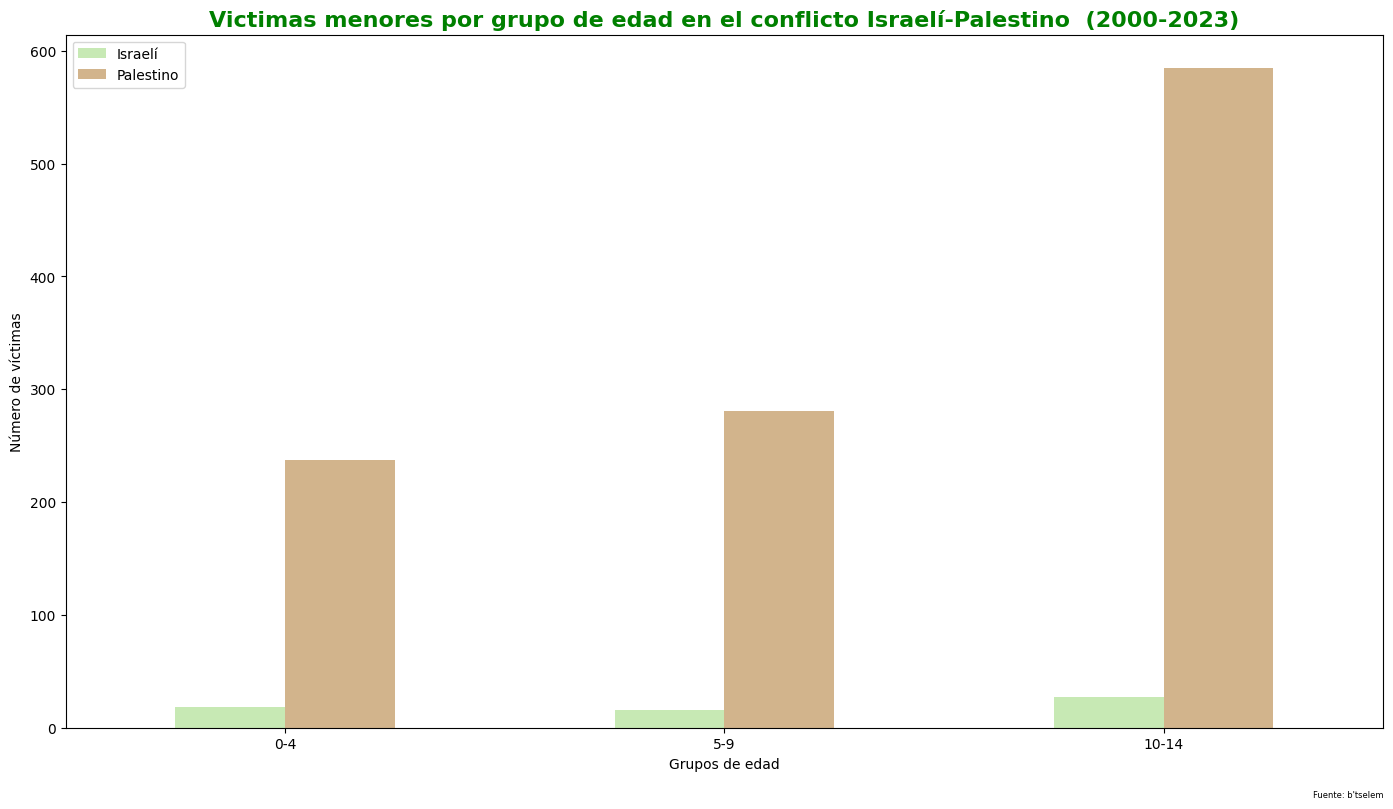

In [9]:

# Creating age groups for victims
age_groups = [0, 5, 10, 15]
age_group_labels = ['0-4', '5-9', '10-14']

# Categorizing the data into age groups
data['age_group'] = pd.cut(data['age'], bins=age_groups, labels=age_group_labels, right=False)

# Calculating the number of victims in each age group for both Israelis and Palestinians
age_group_counts = data.groupby(['citizenship', 'age_group']).size().unstack(fill_value=0)

# Define color palette
my_col = ['#c7e9b4','#D2B48C']

# Plotting the data with the defined color palette
fig, ax = plt.subplots(figsize=(17, 9))
age_group_counts.T.plot(kind='bar', ax=ax, color=my_col)
ax.set_title('Victimas menores por grupo de edad en el conflicto Israelí-Palestino  (2000-2023)',color='green', weight='bold', fontsize=16)
ax.set_xlabel('Grupos de edad')
ax.set_ylabel('Número de víctimas')
ax.set_xticklabels(age_group_labels, rotation=0)

# Updating the legend to remove 'citizenship' label
ax.legend(title='', labels=['Israelí', 'Palestino'])
ax.text(1, -0.1, "Fuente: b'tselem", transform=ax.transAxes, ha='right', fontsize=6)


plt.show()

In [22]:
# Agrupar los datos por año y ciudadanía y contar las ocurrencias
victim_count_by_year = data.groupby(['e_year', 'citizenship']).size().unstack(fill_value=0)

# Mostrar la tabla de víctimas por año
print(victim_count_by_year)

# Calculate the total number of Palestinian and Israeli victims
total_palestinian_victims = victim_count_by_year.get('Palestino', 0).sum()
total_israeli_victims = victim_count_by_year.get('Israelí', 0).sum()

total_israeli_victims,total_palestinian_victims

citizenship  Israelí  Palestino
e_year                         
2000              29          6
2001             161        189
2002             291       1031
2003             146        586
2004              99        829
2005              44        190
2006              19        665
2007              10        385
2008              30        885
2009               9       1036
2010               7         82
2011              12        117
2012               5        256
2013               3         38
2014              59       2272
2015              20        157
2016               8        107
2017               7         69
2018               7        295
2019               9        136
2020               2         28
2021               9        316
2022              17        187
2023              26        223


(1029, 10085)

In [11]:
victim_count_by_year.to_csv('victim_count_by_year.csv', index=True)

In [ ]:
!pip bar_chart_race
import pandas as pd
import bar_chart_race as bcr

# Cargar el archivo CSV


# Calcular la suma acumulada de muertes para cada categoría
data_cumulative = victim_count_by_year.cumsum()

# Crear la animación de bar chart race con los datos acumulativos
bcr.bar_chart_race(
    df=data_cumulative,
    filename='bar_chart_race_cumulative.mp4',
    orientation='h',
    sort='desc',
    n_bars=2,  # Ajustar según las categorías que deseas mostrar
    fixed_order=False,
    fixed_max=True,
    steps_per_period=100,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .98, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='Año: {x:.0f}',
    period_summary_func=lambda v, r: {'x': .98, 'y': .18,
                                      's': f'Muertes totales: {v.nlargest(2).sum():,.0f}',
                                      'ha': 'right', 'size': 8},
    perpendicular_bar_func=None,
    figsize=(6, 4),
    dpi=144,
    cmap='dark12',
    title='Incremento de víctimas por año',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict=None,
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=True)


In [13]:




# Calcular la suma total acumulada de muertes para usar en el resumen del período
total_deaths_cumulative = victim_count_by_year.cumsum().iloc[-1]

# Crear la animación de bar chart race
bcr.bar_chart_race(
    df=victim_count_by_year,
    filename='bar_chart_race.mp4',
    orientation='h',
    sort='desc',
    n_bars=2,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=150,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .98, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='Año: {x:.0f}',
    period_summary_func=lambda v, r: {'x': .98, 'y': .18,
                                      's': f'Muertes totales: {total_deaths_cumulative.sum():,.0f}',
                                      'ha': 'right', 'size': 8},
    perpendicular_bar_func=None,
    figsize=(6, 4),
    dpi=144,
    cmap='dark12',
    title='Incremento de víctimas por año',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict=None,
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=True)

# Asegúrate de ajustar la ruta del archivo CSV y el nombre del archivo de salida según sea necesario.


NameError: name 'bcr' is not defined

In [56]:
import plotly.graph_objects as go
import pandas as pd

# Cargar los datos

# Filtramos para excluir nacionalidades que no deseamos incluir
data = data[~data['citizenship'].isin(['American', 'Jordanian'])]

# Definir grupos de edad
age_bins = [0, 16, 26, 36, 99]
age_labels = ['0-16', '17-26', '27-36', '37-99']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Filtrar para las 4 municiones más comunes
top_ammunitions = data['ammunition'].value_counts().nlargest(4).index
filtered_data = data[data['ammunition'].isin(top_ammunitions)]

# Calcular los conteos para el diagrama aluvial
grouped = filtered_data.groupby(['citizenship', 'event_location_region', 'gender', 'age_group', 'ammunition']).size().reset_index(name='count')

# Mapear cada categoría única a un índice
label_indices = {val: idx for idx, val in enumerate(grouped['citizenship'].unique().tolist() +
                                                     grouped['event_location_region'].unique().tolist() +
                                                     grouped['gender'].unique().tolist() +
                                                     grouped['age_group'].unique().tolist() +
                                                     grouped['ammunition'].unique().tolist())}

# Colores para israelíes y palestinos
palestinian_color = '#D2B48C'  # Color asignado a los palestinos
israeli_color = '#c7e9b4'      # Color asignado a los israelíes

# Asignar colores a los nodos basados en la ciudadanía
node_colors = [palestinian_color if 'Palestinian' in label else israeli_color if 'Israeli' in label else '#E0E0E0' for label in label_indices]

# Construir listas de fuentes, objetivos y valores
sources = []
targets = []
values = []

for _, row in grouped.iterrows():
    sources.append(label_indices[row['citizenship']])
    targets.append(label_indices[row['event_location_region']])
    sources.append(label_indices[row['event_location_region']])
    targets.append(label_indices[row['gender']])
    sources.append(label_indices[row['gender']])
    targets.append(label_indices[str(row['age_group'])])
    sources.append(label_indices[str(row['age_group'])])
    targets.append(label_indices[row['ammunition']])
    values.extend([row['count']] * 4) # Repetimos el conteo para cada paso del flujo

labels = list(label_indices.keys())

# Definir colores para nodos específicos
palestinian_color = '#D2B48C'
israeli_color = '#c7e9b4'

# Asignar colores a los nodos basados en la nacionalidad
node_colors = []
for label in labels:
    if label == 'Palestino':
        node_colors.append(palestinian_color)
    elif label == 'Israelí':
        node_colors.append(israeli_color)
    else:


# Crear el diagrama aluvial con Plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors  # Asignar los colores a los nodos
    ),
    link=dict(
        source=sources,  # Lista de índices de las fuentes
        target=targets,  # Lista de índices de los objetivos
        value=values     # Lista de valores para cada flujo
        # Puedes especificar 'color' para los enlaces si es necesario
    ))])

fig.update_layout(title_text="Diagrama Aluvial de Víctimas", font_size=10)
# fig.show()  # Descomentar esta línea para mostrar el diagrama en un entorno que soporte plotly


IndentationError: expected an indented block after 'else' statement on line 64 (<ipython-input-56-4d2ed4efcf0a>, line 68)

In [20]:
import plotly.graph_objects as go
import pandas as pd

# Cargar los datos

# Excluir ciudadanos americanos y jordanos
data = data[~data['citizenship'].isin(['American', 'Jordanian'])]

# Definir grupos de edad
age_bins = [0, 16, 26, 36, 99]
age_labels = ['0-16', '17-26', '27-36', '37-99']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Filtrar para las 4 municiones más comunes
top_ammunitions = data['ammunition'].value_counts().nlargest(4).index
filtered_data = data[data['ammunition'].isin(top_ammunitions)]

# Calcular los conteos para el diagrama aluvial
grouped = filtered_data.groupby(['citizenship', 'event_location_region', 'gender', 'age_group', 'ammunition']).size().reset_index(name='count')

# Mapear cada categoría única a un índice
label_list = grouped['citizenship'].unique().tolist() + \
             grouped['event_location_region'].unique().tolist() + \
             grouped['gender'].unique().tolist() + \
             grouped['age_group'].unique().tolist() + \
             grouped['ammunition'].unique().tolist()
label_indices = {label: i for i, label in enumerate(label_list)}

# Colores para israelíes y palestinos, y un color por defecto para otros nodos
palestinian_color = '#D2B48C'
israeli_color = '#c7e9b4'
other_colors = ['#7FB3D5', '#E59866', '#F7DC6F', '#AED6F1', '#F5B7B1', '#D7BDE2', '#A9CCE3', '#A3E4D7', '#FAD7A0', '#EDBB99']  # Ejemplos de colores

node_colors = []
other_color_index = 0
for label in label_list:
    if 'Palestino' in label:
        node_colors.append(palestinian_color)
    elif 'Israelí' in label:
        node_colors.append(israeli_color)
    else:
        node_colors.append(other_colors[other_color_index % len(other_colors)])
        other_color_index += 1
# Construir listas de fuentes, objetivos y valores
sources = []
targets = []
values = []

for _, row in grouped.iterrows():
    sources.append(label_indices[row['citizenship']])
    targets.append(label_indices[row['event_location_region']])
    sources.append(label_indices[row['event_location_region']])
    targets.append(label_indices[row['gender']])
    sources.append(label_indices[row['gender']])
    targets.append(label_indices[str(row['age_group'])])
    sources.append(label_indices[str(row['age_group'])])
    targets.append(label_indices[row['ammunition']])
    values.extend([row['count']] * 4) # Repetimos el conteo para cada paso del flujo

# Crear el diagrama aluvial
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=node_colors  # Asignar los colores a los nodos
    ),
    link=dict(
        source=sources,  # Lista de índices de las fuentes
        target=targets,  # Lista de índices de los objetivos
        value=values     # Lista de valores para cada flujo
    ))])

# Configurar el título con negrita usando HTML
fig.update_layout(
    title_text="<b>Diagrama Aluvial de Víctimas</b>",
    title_font=dict(size=16, color='green'),
    margin=dict(t=100)  # Asegúrate de dejar suficiente espacio para el título
)

# Añadir la nota al pie de página un poco más abajo
fig.add_annotation(
    text="Fuente: b'tselem",
    xref="paper", yref="paper",
    x=1, y=-0.05,  # Mover la anotación un poco más abajo
    showarrow=False,
    font=dict(size=8, color='#000000'),
    align="right",
    xanchor='right', yanchor='bottom'
)

# Guardar el gráfico en un archivo HTML
fig.show()
fig.write_html('sankey_diagram.html')  # Exportar a HTML


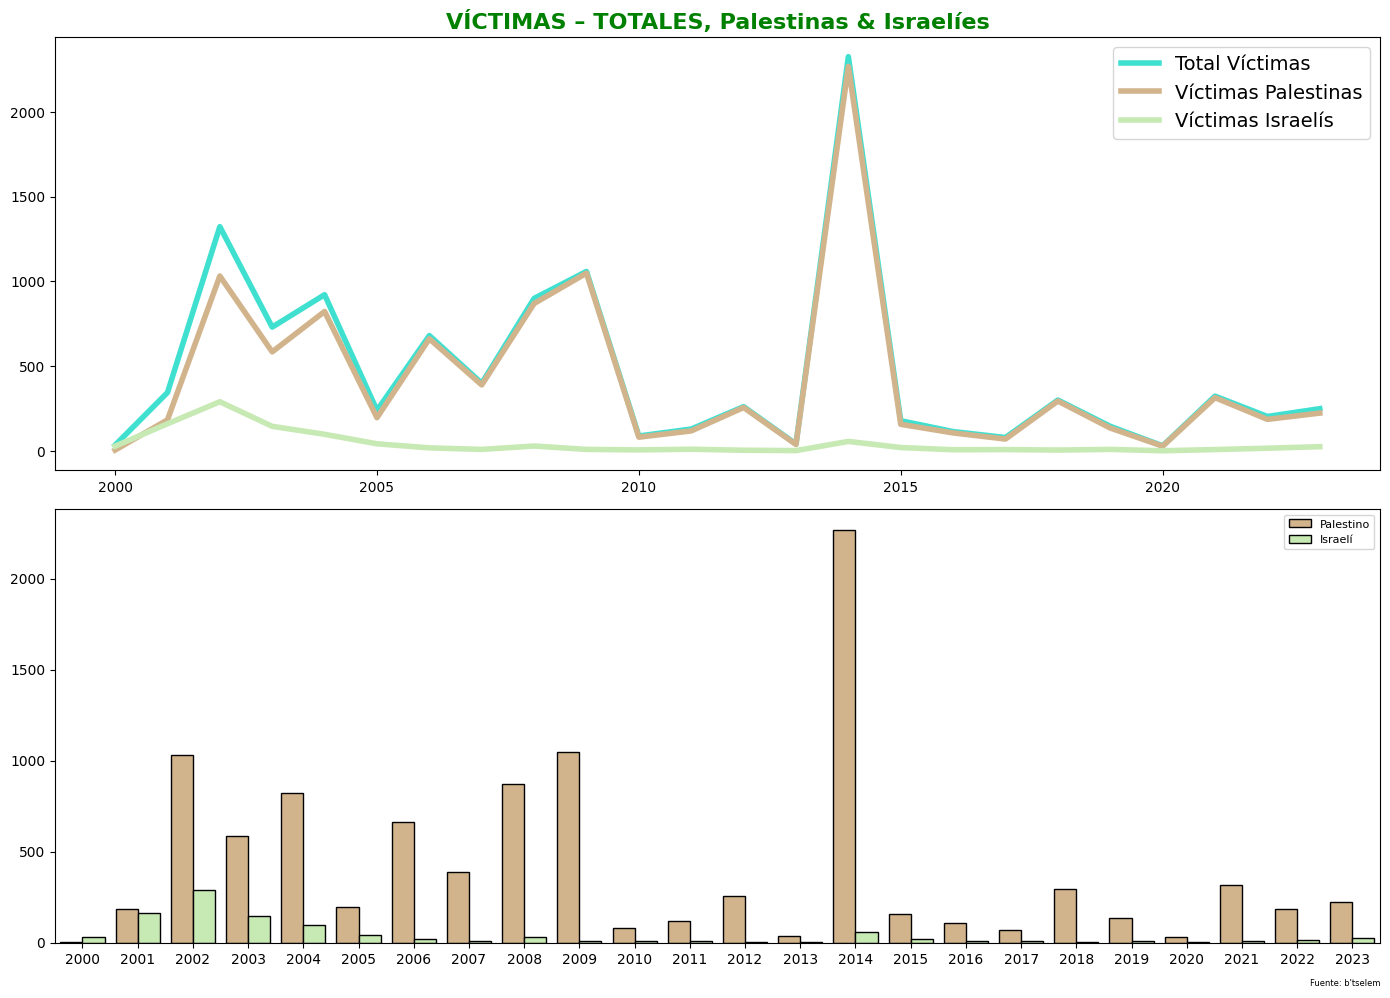

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'date_of_death' is in datetime format
data['date_of_death'] = pd.to_datetime(data['date_of_death'])

# Extract the year from the 'date_of_death' column
data['d_year'] = data['date_of_death'].dt.year

# Prepare the data for the plots
# Filter data by citizenship and count fatalities per year
total_victims = data['d_year'].value_counts()[data['d_year'].unique()].sort_index()
palestinian_victims = data['d_year'][data['citizenship'] == 'Palestino'].value_counts()[data['d_year'].unique()].sort_index()
israeli_victims = data['d_year'][data['citizenship'] == 'Israelí'].value_counts()[data['d_year'].unique()].sort_index()

# Define color palette
my_col = ['#D2B48C', '#c7e9b4']

# Creando los plots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))  # Dos subplots en una columna

# Primer subplot
axs[0].plot(total_victims.index, total_victims.values, label='Total Víctimas', color='#40E0D0', alpha=1, linewidth=4)
axs[0].plot(palestinian_victims.index, palestinian_victims.values, label='Víctimas Palestinas', color='#D2B48C', alpha=1, linewidth=4)
axs[0].plot(israeli_victims.index, israeli_victims.values, label='Víctimas Israelís', color='#c7e9b4', alpha=1, linewidth=4)
axs[0].set_title('VÍCTIMAS – TOTALES, Palestinas & Israelíes', color='green', weight='bold', fontsize=16)
axs[0].legend(loc='upper right', fontsize=14)


# Segundo subplot
sns.countplot(x='d_year', hue='citizenship', data=data, palette=my_col, edgecolor="black", saturation=1, ax=axs[1])
axs[1].legend(loc='upper right', fontsize=8)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)
# Agregar texto al segundo subplot
axs[1].text(1, -0.1, "Fuente: b'tselem", transform=axs[1].transAxes, ha='right', fontsize=6)

plt.tight_layout()

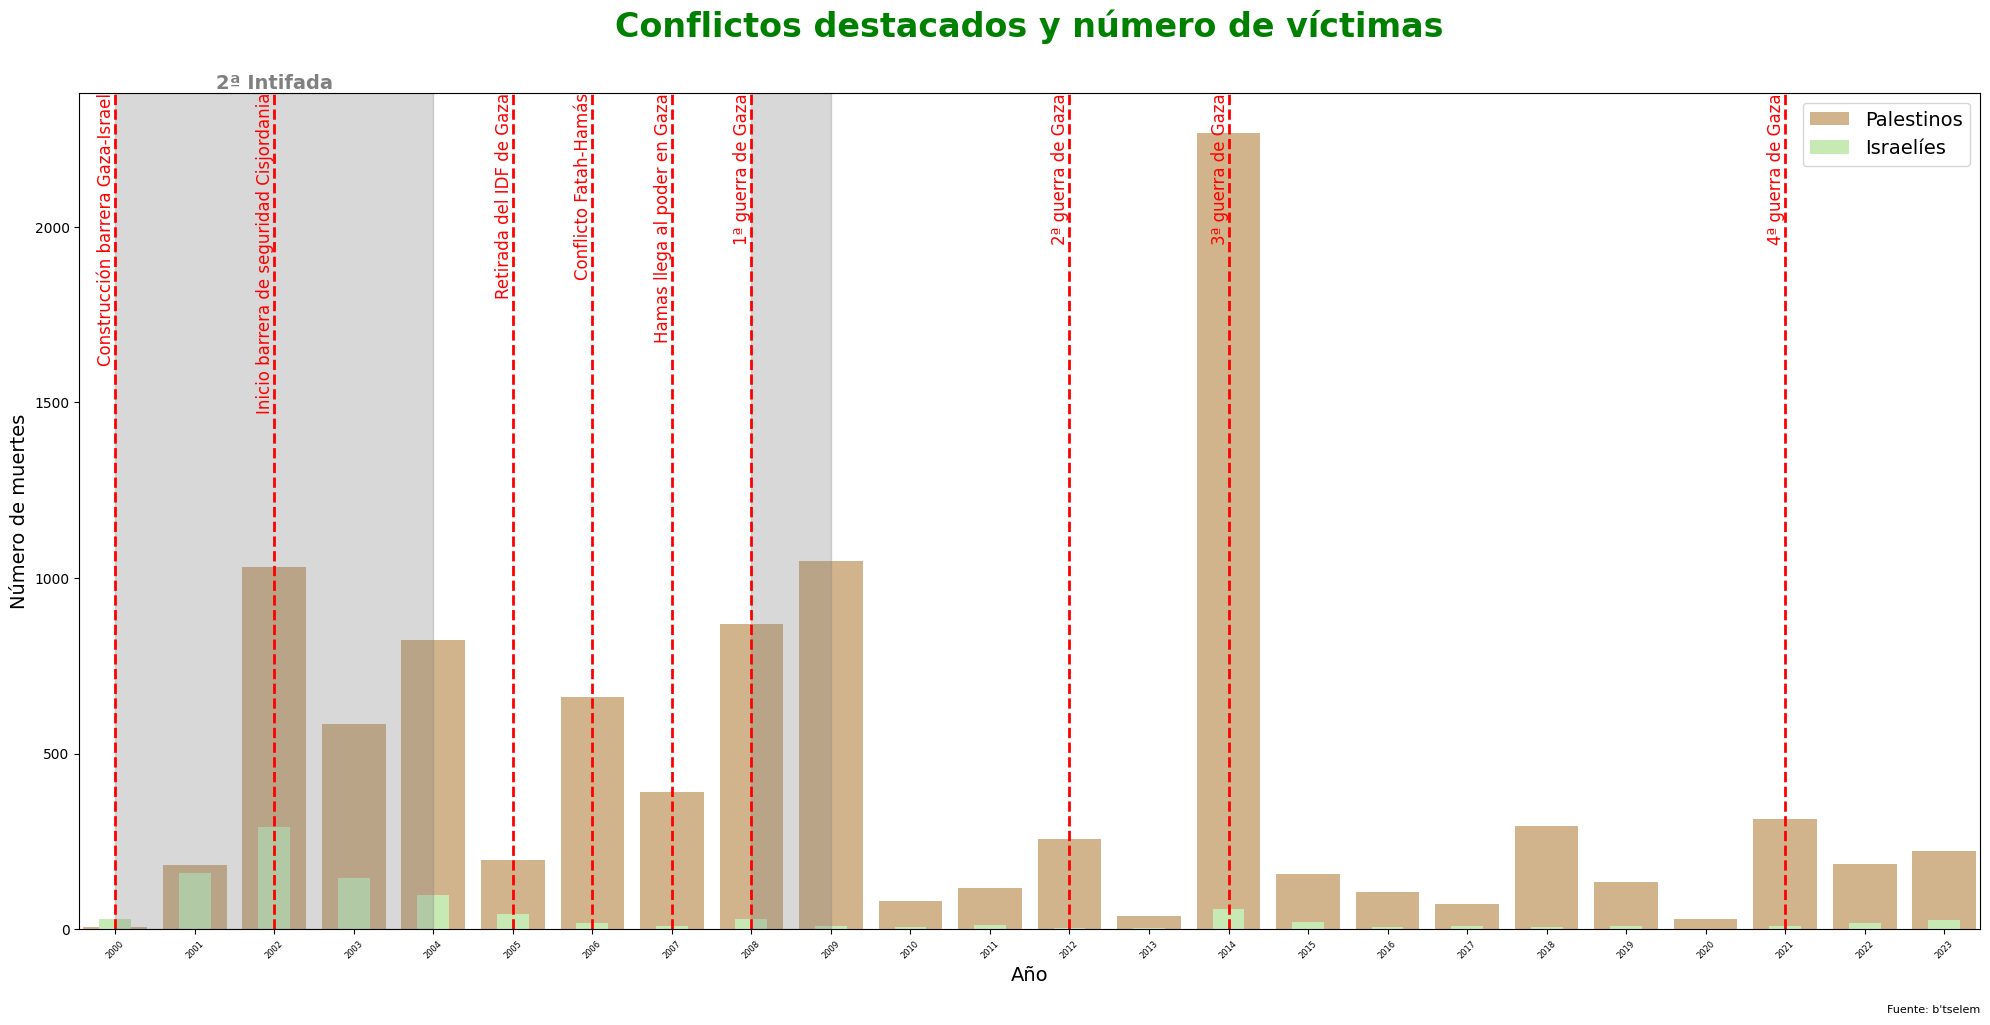

In [26]:
# Based on the provided dataset, we'll recreate a similar bar chart with actual data and marked events
# We'll use the previously loaded data and create a new bar chart in Spanish

# Important events from the period starting in 2000
events = {
    'Construcción barrera Gaza-Israel': 2000,
    'Inicio barrera de seguridad Cisjordania': 2002,
    'Retirada del IDF de Gaza': 2005,
    '1ª guerra de Gaza': 2008,
    '2ª guerra de Gaza': 2012,
    '3ª guerra de Gaza': 2014,
    '4ª guerra de Gaza': 2021  # Assuming 2021 as the latest conflict date for the example
}



# Increase the font size for event annotations
event_annotation_fontsize = 12

yearly_deaths = data.groupby(['d_year', 'citizenship']).size().unstack(fill_value=0)
yearly_deaths = yearly_deaths.reindex(columns=['Palestino', 'Israelí']).fillna(0)  # Ensure correct column order

# Adjusting the plot with the same colors used in the previous victim bar charts and adding the source label

# Colors for the bars
palestinian_color = '#D2B48C'  # Tan color for Palestinian deaths
israeli_color = '#c7e9b4'      # Pale green for Israeli deaths
# Adjusting the text annotation for the 2nd Intifada to be in bold and grey

# Re-creating the plot with the requested adjustments
fig, ax = plt.subplots(figsize=(20, 12))

# Plotting the data
yearly_deaths['Palestino'].plot(kind='bar', ax=ax, color=palestinian_color, width=0.8, label='Palestinos')
yearly_deaths['Israelí'].plot(kind='bar', ax=ax, color=israeli_color, width=0.4, label='Israelíes')

# Highlighting the period of the 1st Gaza War
gaza_war_1_start, gaza_war_1_end = 2008, 2009
ax.axvspan(gaza_war_1_start - yearly_deaths.index.min(), gaza_war_1_end - yearly_deaths.index.min(), color='grey', alpha=0.3)

# Adding the Fatah-Hamas conflict event in 2006
fatah_hamas_conflict_year = 2006
ax.axvline(x=fatah_hamas_conflict_year - yearly_deaths.index.min(), color='red', linestyle='--', lw=2)
ax.text(fatah_hamas_conflict_year - yearly_deaths.index.min(), ax.get_ylim()[1], 'Conflicto Fatah-Hamás', rotation=90, verticalalignment='top', horizontalalignment='right', color='red', fontsize=event_annotation_fontsize)


# Highlighting the period of the 2nd Intifada
intifada_start, intifada_end = 2000, 2004
ax.axvspan(intifada_start - yearly_deaths.index.min(), intifada_end - yearly_deaths.index.min(), color='grey', alpha=0.3)
ax.text((intifada_start + intifada_end) / 2 - yearly_deaths.index.min(), ax.get_ylim()[1], '2ª Intifada', color='grey', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Adding other event annotations
for event, year in events.items():
    if year in yearly_deaths.index:
        ax.axvline(x=year - yearly_deaths.index.min(), color='red', linestyle='--', lw=2)
        ax.text(year - yearly_deaths.index.min(), ax.get_ylim()[1], event, rotation=90, verticalalignment='top', horizontalalignment='right', color='red', fontsize=event_annotation_fontsize)

# Adding the "Hamas llega al poder en Gaza" event
hamas_power_year = 2007
ax.axvline(x=hamas_power_year - yearly_deaths.index.min(), color='red', linestyle='--', lw=2)
ax.text(hamas_power_year - yearly_deaths.index.min(), ax.get_ylim()[1], 'Hamas llega al poder en Gaza', rotation=90, verticalalignment='top', horizontalalignment='right', color='red', fontsize=event_annotation_fontsize)

# Customizing the plot
ax.set_title('Conflictos destacados y número de víctimas', fontsize=24, weight='bold', color='green', pad=40)
ax.set_ylabel('Número de muertes', fontsize=14)
ax.set_xlabel('Año', fontsize=14)
ax.set_xticklabels(yearly_deaths.index, rotation=45, fontsize=6)
ax.legend(fontsize=14)

# Adding the source label at the bottom right
ax.text(1, -0.1, 'Fuente: b\'tselem', transform=ax.transAxes, ha='right', fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

# Show the plot
plt.show()

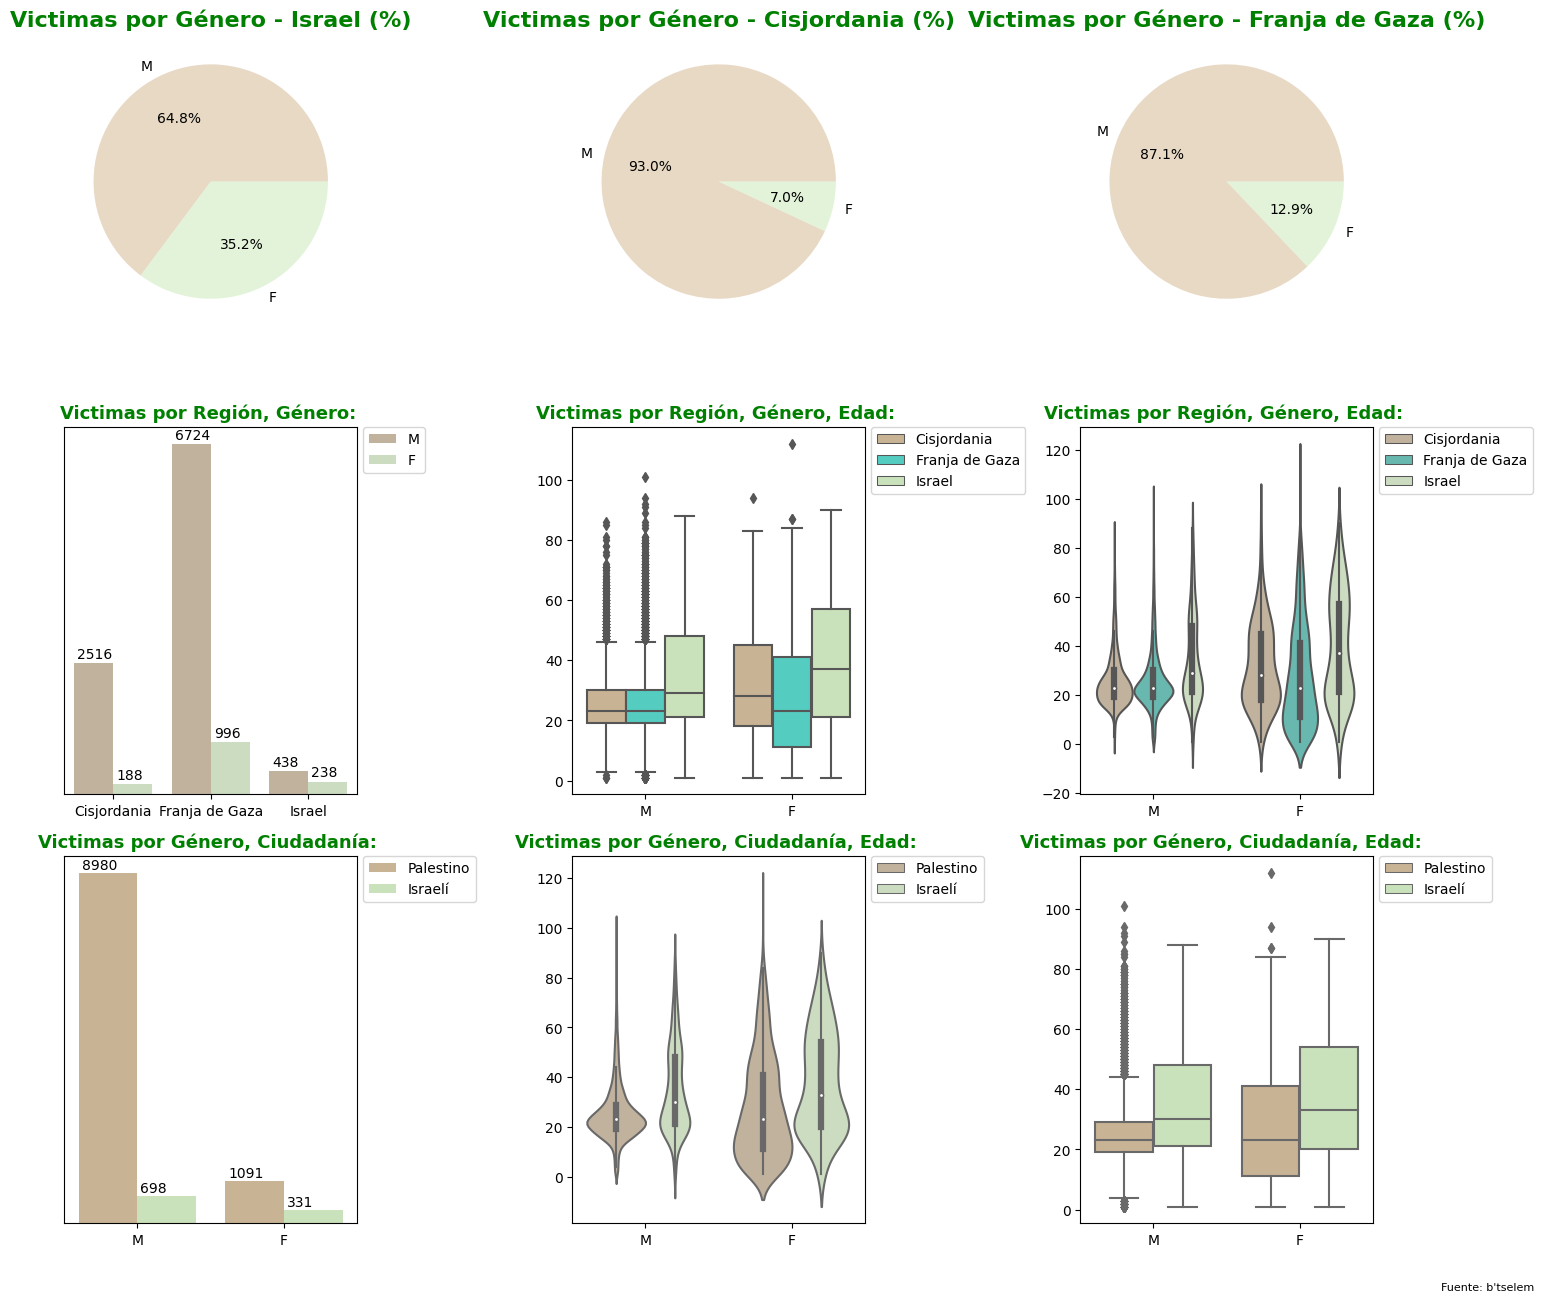

In [27]:



## Análisis Bivariado y Multivariado
## Victimas por Edad, Región, Ciudadanía y Género
# Define color palette
Reg_color = ['#D2B48C','#40E0D0', '#c7e9b4']

plt.subplots(figsize=(15, 15))

plt.subplot(331)
plt.title('Victimas por Género - Israel (%)', color='green', weight='bold', fontsize=16)
data[data['event_location_region'] == 'Israel']['gender'].value_counts().plot(kind='pie', subplots=True, colors=my_col, legend=None, ylabel='', wedgeprops={"alpha": 0.5}, autopct='%1.1f%%')

plt.subplot(332)
plt.title('Victimas por Género - Cisjordania (%)', color='green', weight='bold', fontsize=16)
data[data['event_location_region'] == 'Cisjordania']['gender'].value_counts().plot(kind='pie', subplots=True, colors=my_col, legend=None, ylabel='', wedgeprops={"alpha": 0.5}, autopct='%1.1f%%')

plt.subplot(333)
plt.title('Victimas por Género - Franja de Gaza (%)', color='green', weight='bold', fontsize=16)
data[data['event_location_region'] == 'Franja de Gaza']['gender'].value_counts().plot(kind='pie', subplots=True, colors=my_col, legend=None, ylabel='', wedgeprops={"alpha": 0.5}, autopct='%1.1f%%')

plt.subplot(334)
plt.title('Victimas por Región, Género: ', color='green', weight='bold', fontsize=13)
ax = sns.countplot(x=data['event_location_region'], hue=data['gender'], palette=my_col, saturation=0.5)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+100))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(335)
plt.title('Victimas por Región, Género, Edad: ', color='green', weight='bold', fontsize=13)
sns.boxplot(x=data['gender'], y=data['age'], hue=data['event_location_region'], palette=Reg_color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None)

plt.subplot(336)
plt.title('Victimas por Región, Género, Edad: ', color='green', weight='bold', fontsize=13)
sns.violinplot(x=data['gender'], y=data['age'], hue=data['event_location_region'], palette=Reg_color, saturation=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None)

plt.subplot(337)
plt.title('Victimas por Género, Ciudadanía: ', color='green', weight='bold', fontsize=13)
ax = sns.countplot(x=data['gender'], hue=data['citizenship'], palette=my_col)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+100))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(338)
plt.title('Victimas por Género, Ciudadanía, Edad: ', color='green', weight='bold', fontsize=13)
sns.violinplot(x=data['gender'], y=data['age'], hue=data['citizenship'], palette=my_col, saturation=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None)

plt.subplot(339)
plt.title('Victimas por Género, Ciudadanía, Edad:  ', color='green', weight='bold', fontsize=13)
sns.boxplot(x=data['gender'], y=data['age'], hue=data['citizenship'], palette=my_col)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(None), plt.ylabel(None)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.figtext(0.99, 0.01, "Fuente: b'tselem", ha='right', va='bottom', fontsize=8)


plt.show()

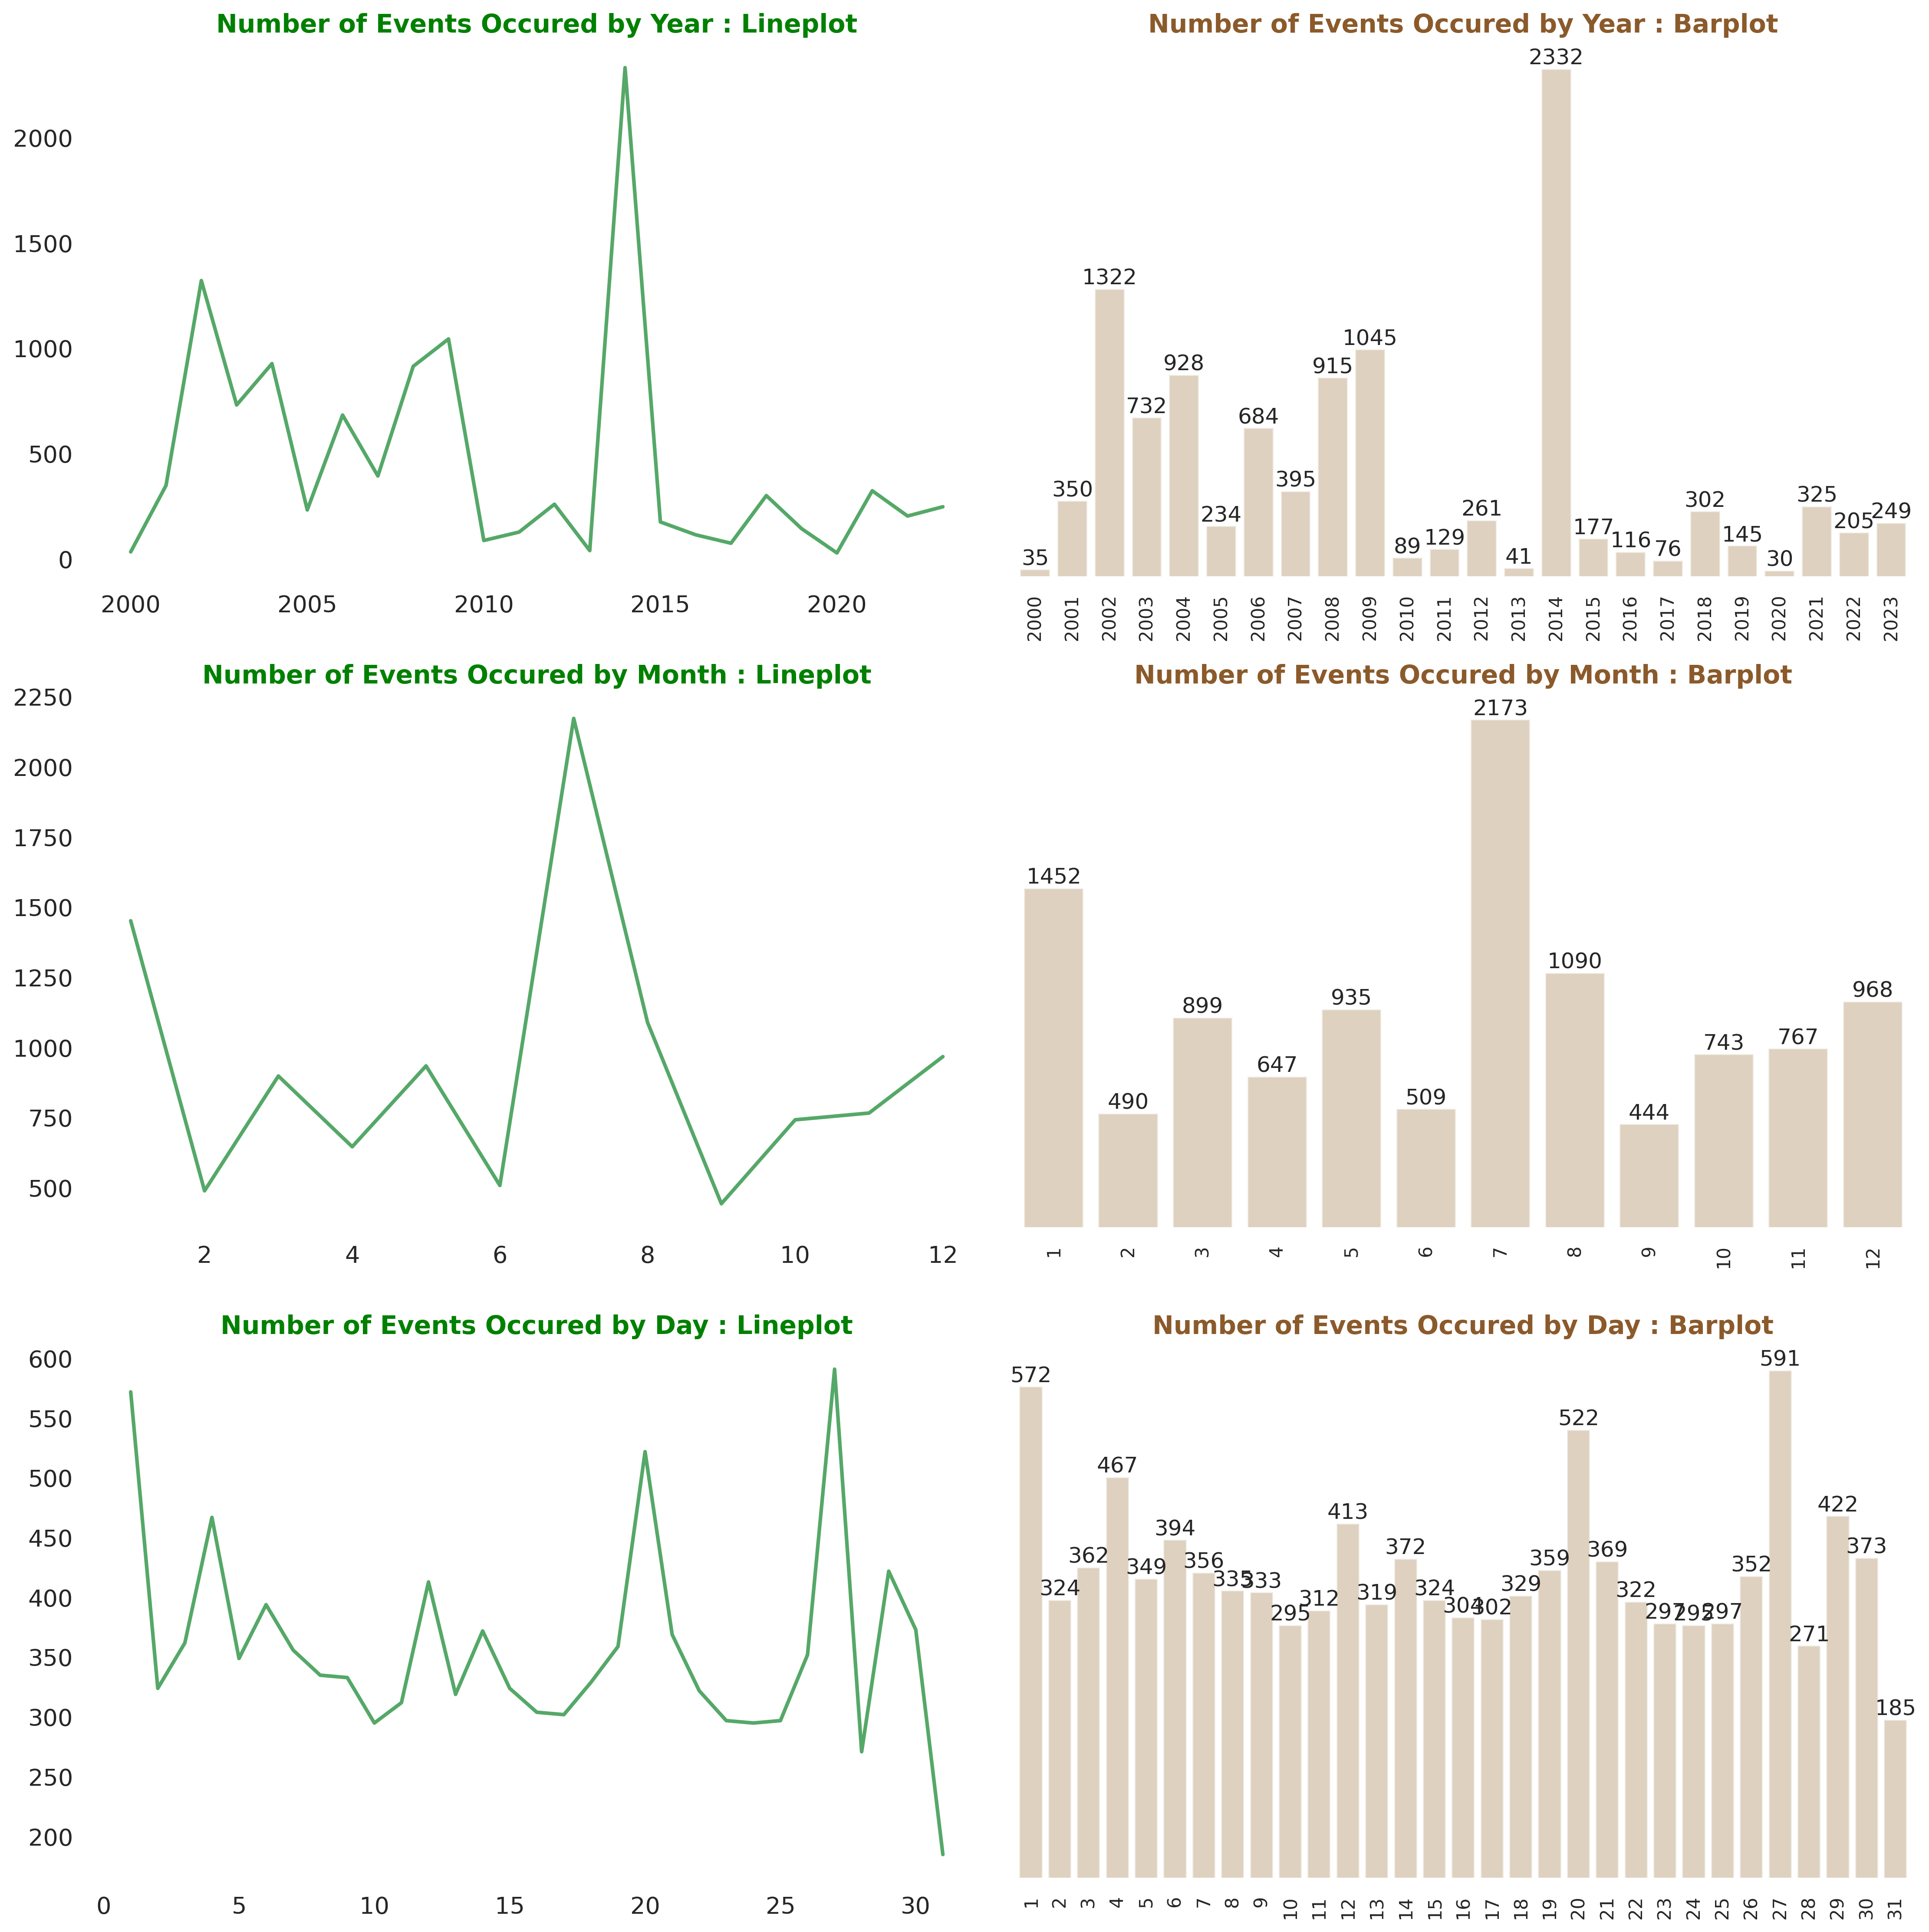

In [ ]:
## Univariate Analysis
## Fatalities data by year, month, day of the month

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#E0EEEE', '#C1CDCD', '#838B8B', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C', '#FFB6C1', '#8B5F65')

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.title('Number of Events Occured by Year : Lineplot', color='green', weight='bold', fontsize = 14)
sns.lineplot(df['e_year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

plt.subplot(322)
plt.title('Number of Events Occured by Year : Barplot', color='#8B5A2B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['e_year'], color='#D2B48C', alpha=0.6)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.subplot(323)
plt.title('Number of Events Occured by Month : Lineplot', color='green', weight='bold', fontsize = 14)
sns.lineplot(df['e_month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

plt.subplot(324)
plt.title('Number of Events Occured by Month : Barplot', color='#8B5A2B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['e_month'], color='#D2B48C', alpha=0.6)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.subplot(325)
plt.title('Number of Events Occured by Day : Lineplot', color='green', weight='bold', fontsize = 14)
sns.lineplot(df['e_day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

plt.subplot(326)
plt.title('Number of Events Occured by Day : Barplot', color='#8B5A2B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['e_day'], color='#D2B48C', alpha=0.6)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

plt.show()

In [ ]:
## Univariate Analysis
## Fatalities by Age
## Fatalities by Region
## Fatalities by Gender
## Fatalities by Citizenship

plt.subplots(figsize=(15,20))

plt.subplot(431)
plt.title('Fatalities by Age : Histogram', color='#00868B', weight='bold', fontsize=14)
sns.histplot(df['age'], color="#40E0D0", bins=28, stat='count')
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(432)
plt.title('Fatalities by Age : Violin Plot', color='#8B5A2B', weight='bold', fontsize=14)
sns.violinplot(df['age'], color="#D2B48C", orient='h')
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(433)
plt.title('Fatalities by Age : Scatter Plot', color='#FF6347', weight='bold', fontsize=14)
sns.scatterplot(df['age'], color="#FF6347", alpha=0.3)
plt.xlabel(None), plt.ylabel(None)

plt.subplot(434)
plt.title('Fatalities by Gender : Barplot', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['gender'], facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 20), order=df['gender'].value_counts().index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 120), ha='center', va='bottom')
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(435)
plt.title('Fatalities by Citizenship : Barplot', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(y=df['citizenship'], facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 20), order=df['citizenship'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 200, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(436)
plt.title('Fatalities by Event Location Region : Barplot', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['event_location_region'], facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 20), order=df['event_location_region'].value_counts().index)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 120), ha='center', va='bottom')
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(437)
plt.title('Fatalities by Gender : Pie Chart', color='#00868B', weight='bold', fontsize=14)
my_xpl = [0.0, 0.05]
df['gender'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'green','linewidth': 2, 'antialiased': True}, autopct='%1.1f')

plt.subplot(438)
plt.title('Fatalities by Citizenship : Pie Chart', color='#00868B', weight='bold', fontsize=14)
my_xpl = [0.0, 0.0, 0.3, 0.6]
df['citizenship'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'green', 'linewidth': 2, 'antialiased': True}, autopct='%1.1f')

plt.subplot(439)
my_xpl = [0.0, 0.0, 0.20]
plt.title('Fatalities by Event Location Region : Pie Chart', color='#00868B', weight='bold', fontsize=14)
df['event_location_region'].value_counts().plot(kind='pie', colors=my_col, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.2, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Some Observations**

- By age, people in the ages from late teens to late 20s are among the highest in numbers, in overall fatalities volume.
- In particular, fatalities of people in the ages 18-24 is highest.
- By gender, men have died more, representing about 87% of overall fatalities.
- By citizenship, more Palestinians have died, accounting for around 91% of all fatalities.
- By Event Location, Gaza Strip has highest number of fatalities, followed by West Bank.

**Some Observations**

- Women fatalities in Israel is peculiarly higher than women fatalities in Gaza Strip and West Bank.
- Mean age of Israeli fatalities is typically higher than Palestinians, in both men and women's categories.

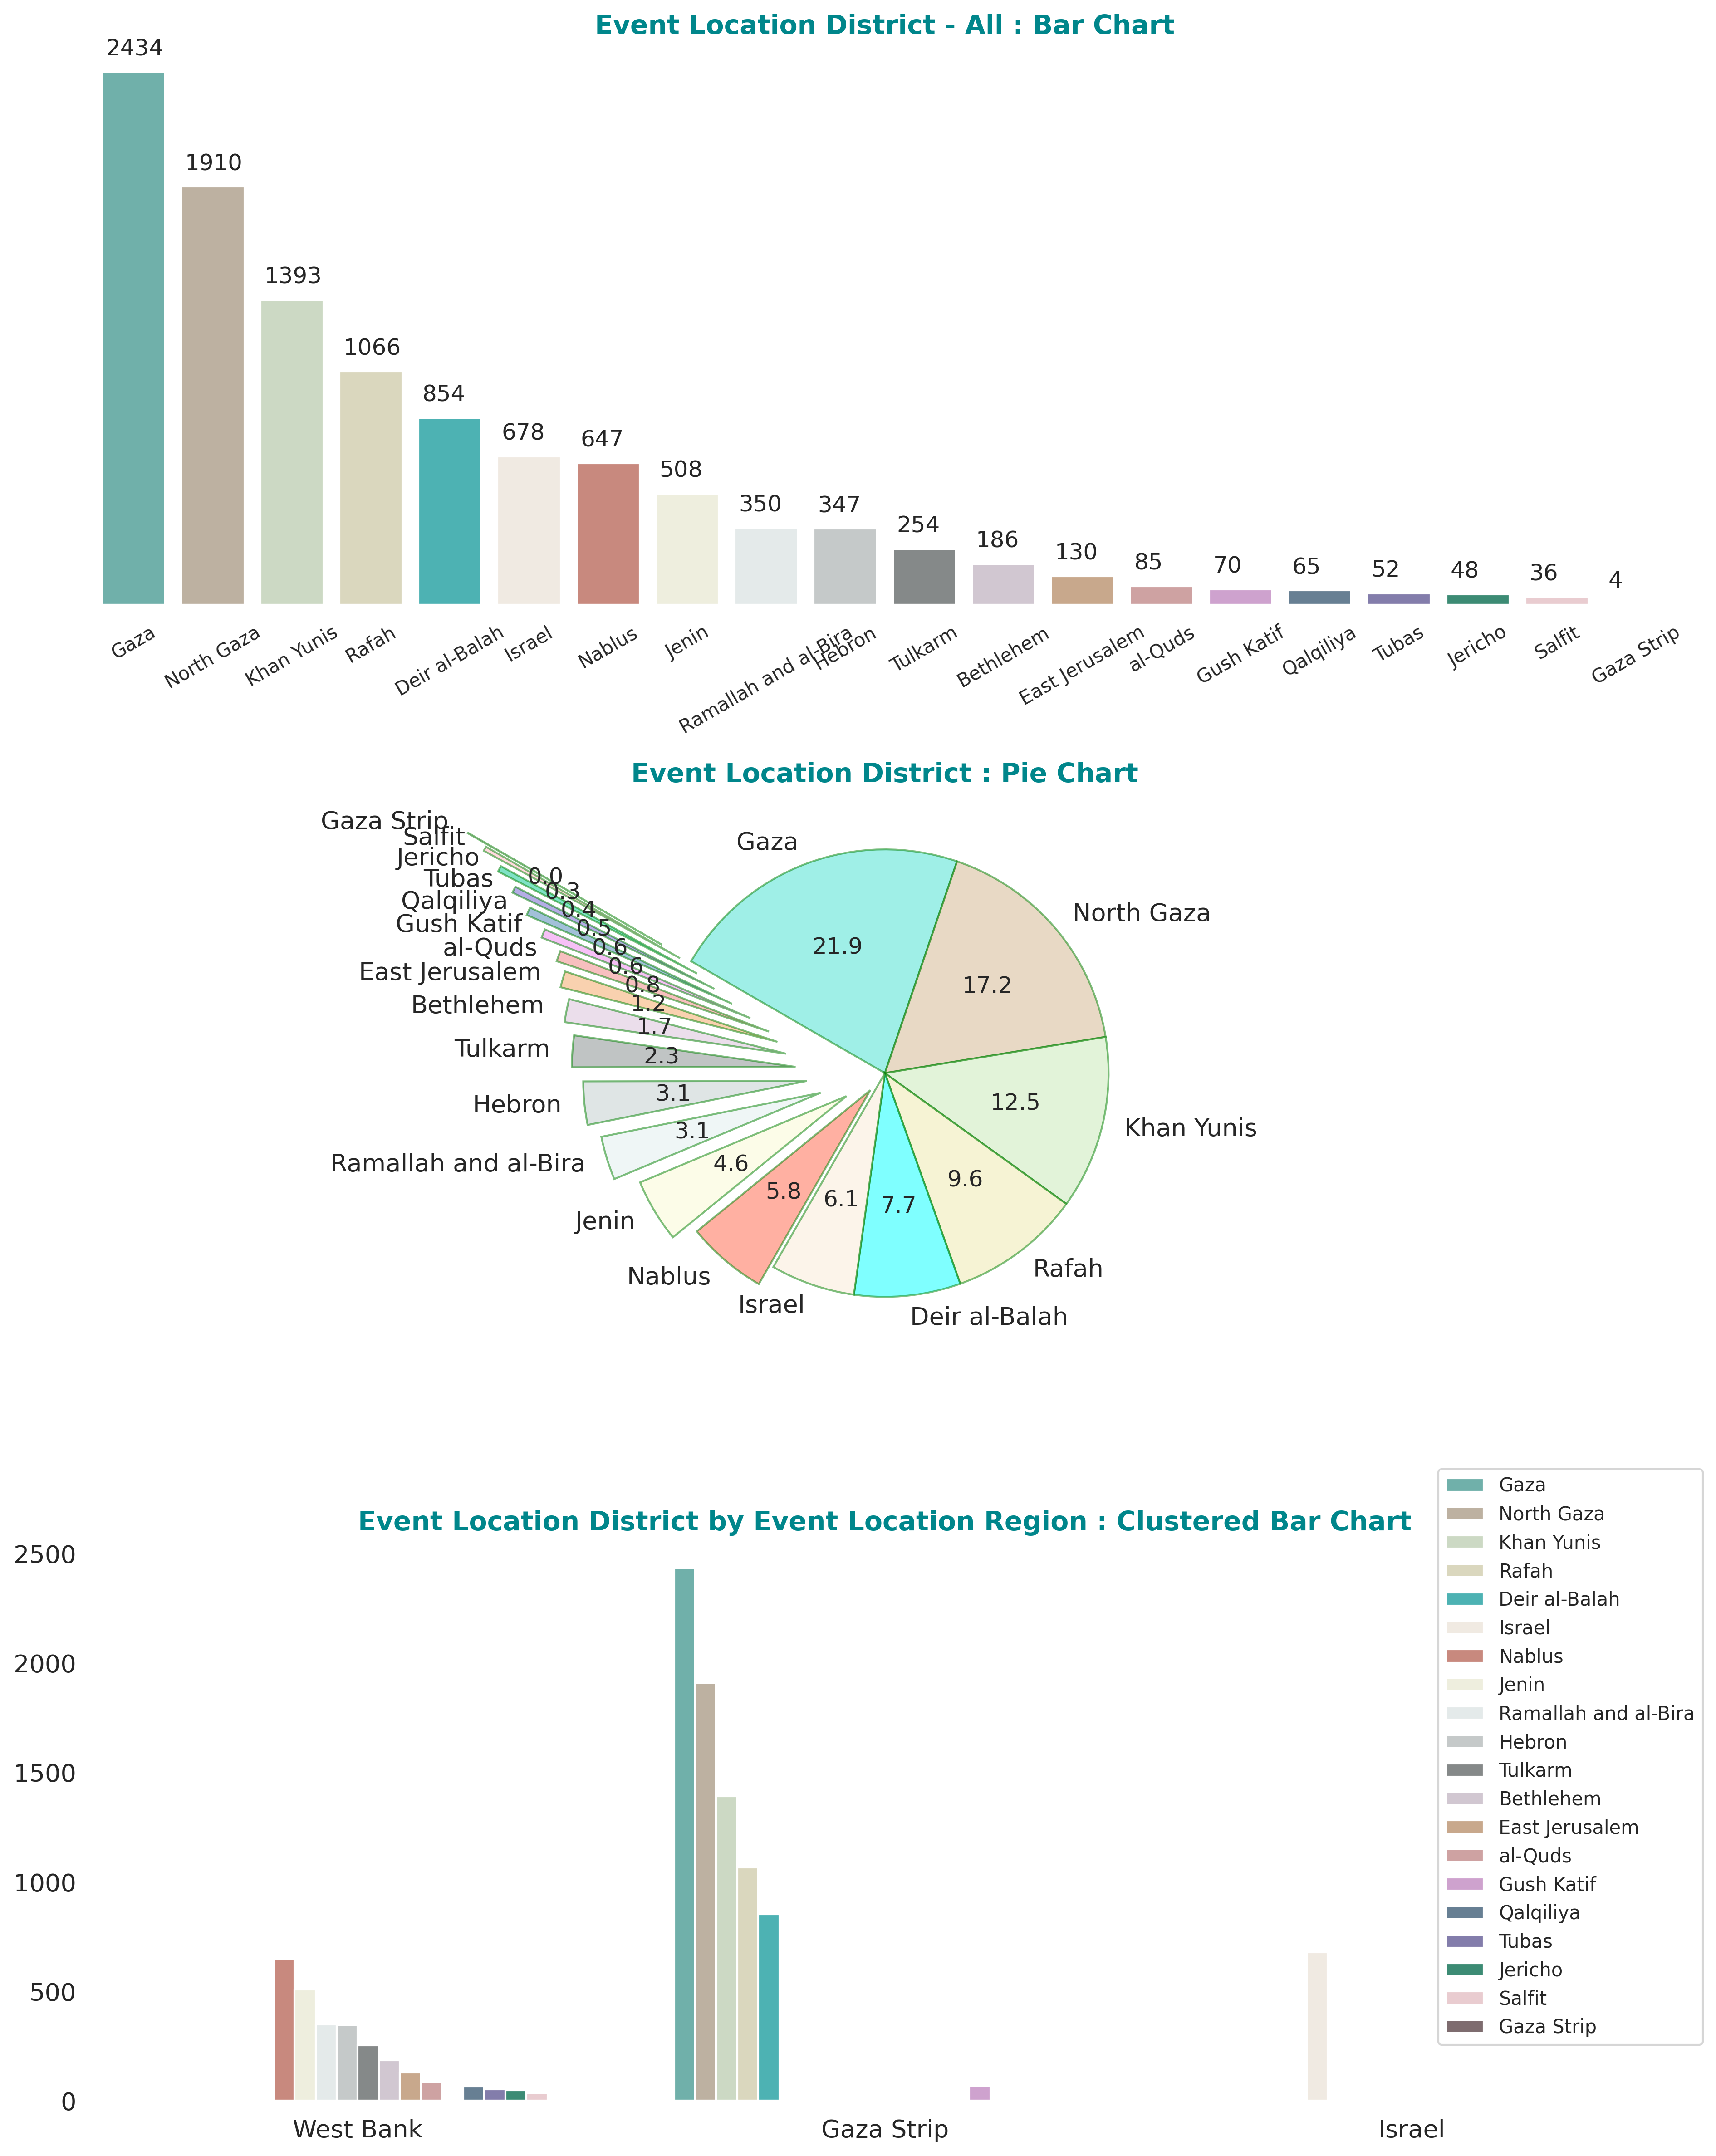

In [ ]:
## Analysis by "Event Location District" & "Event Location Region"
plt.figure(figsize=(13,16))

plt.subplot(311)
plt.title('Event Location District - All : Bar Chart', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['event_location_district'], palette=my_col, saturation=0.4, order=df['event_location_district'].value_counts().index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+75))

plt.ylabel(None), plt.xlabel(None), plt.yticks([]), plt.xticks(rotation=30, fontsize=10)

plt.subplot(312)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10, 0.20, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15]
plt.title('Event Location District : Pie Chart', color='#00868B', weight='bold', fontsize=14)
df['event_location_district'].value_counts().plot(kind='pie', colors=my_col, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'green','linewidth': 1, 'antialiased': True}, autopct='%1.1f')

plt.subplot(313)
plt.title('Event Location District by Event Location Region : Clustered Bar Chart', color='#00868B', weight='bold', fontsize=14)
sns.countplot(x=df['event_location_region'], hue=df['event_location_district'], palette= my_col, saturation=0.4, hue_order=df['event_location_district'].value_counts().index)
plt.legend(bbox_to_anchor=(0.85, 0.1), loc='best', borderaxespad=0, fontsize=10)
plt.ylabel(None), plt.xlabel(None)

plt.show()

**Some Observations**

- Gaza is the most affected Event Location District, with nearly 22% share of total fatalities.
- North Gaza, Khan Yunis, Rafah, and Dier al-Balah, are other major affected districts.

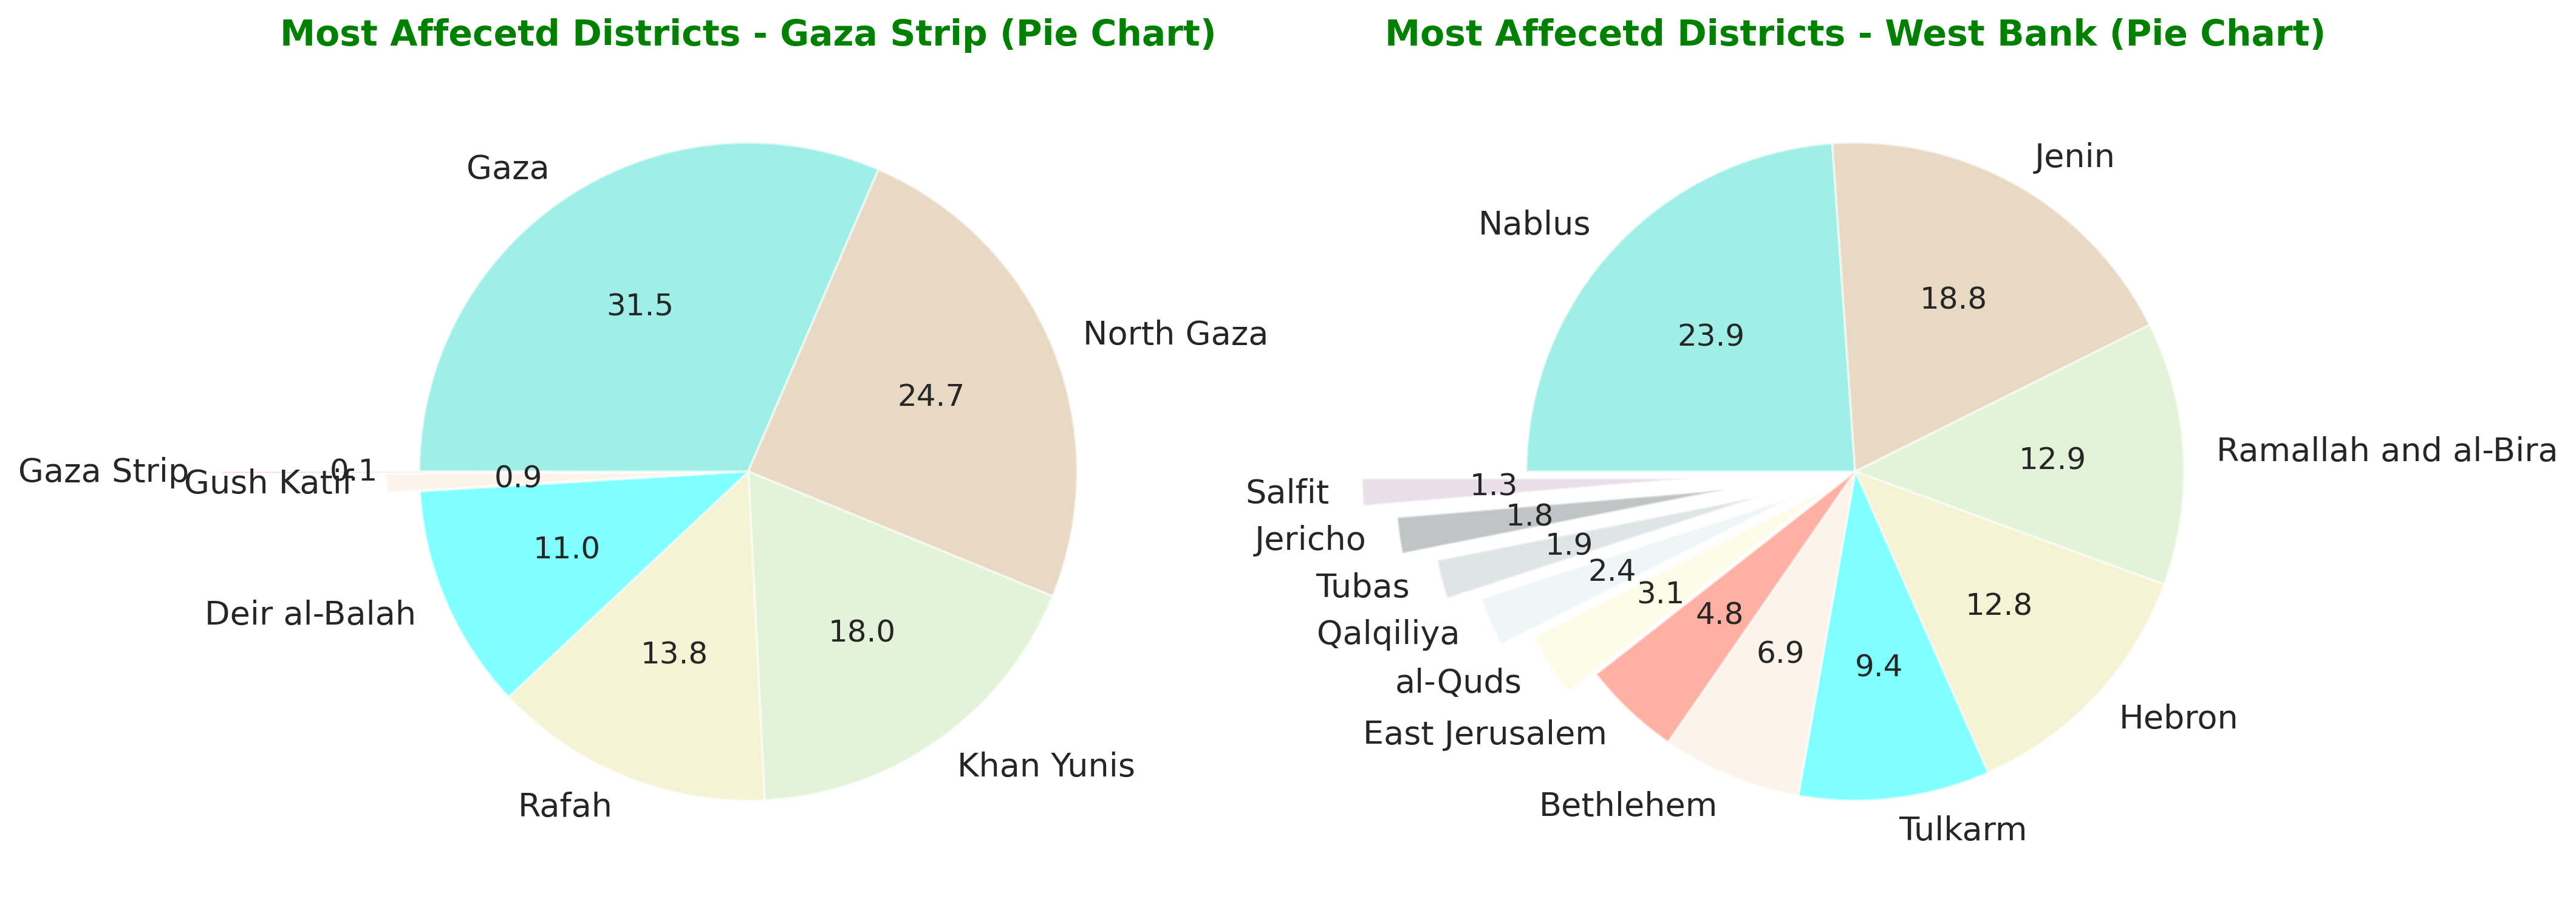

In [ ]:
## Gaza Strip & West Bank have most affecetd districts
## Let's visialise these two regions, individually
plt.figure(figsize=(14,6))

plt.subplot(121)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.6]
plt.title('Most Affecetd Districts - Gaza Strip (Pie Chart)', color='green', weight='bold', fontsize=14)
df[df['event_location_region'] == 'Gaza Strip']['event_location_district'].value_counts().plot.pie(colors = my_col, explode=my_xpl, subplots=True, legend=None, ylabel='', counterclock=False, startangle=180, wedgeprops= {"alpha": 0.5}, autopct='%1.1f')

plt.subplot(122)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
plt.title('Most Affecetd Districts - West Bank (Pie Chart)', color='green', weight='bold', fontsize=14)
df[df['event_location_region'] == 'West Bank']['event_location_district'].value_counts().plot.pie(colors = my_col, explode=my_xpl, subplots=True, legend=None, ylabel='', counterclock=False, startangle=180, wedgeprops= {"alpha": 0.5}, autopct='%1.1f')

plt.show()

**Some Observations**

- **In the Gaza Strip, Gaza and North Gaza** have the highest number of fatalities, with over 55% share of total fatalities.
- Khan Yunis, Rafah and Deir al-Balah are other most affected districts in the Gaza Strip.
- **In the West Bank, Nablus and Jenin** are the most affected district.
- Ramallah and al-Bira, Hebron, Tulkarm, and Bethlehem are other most affected districts in the West Bank.

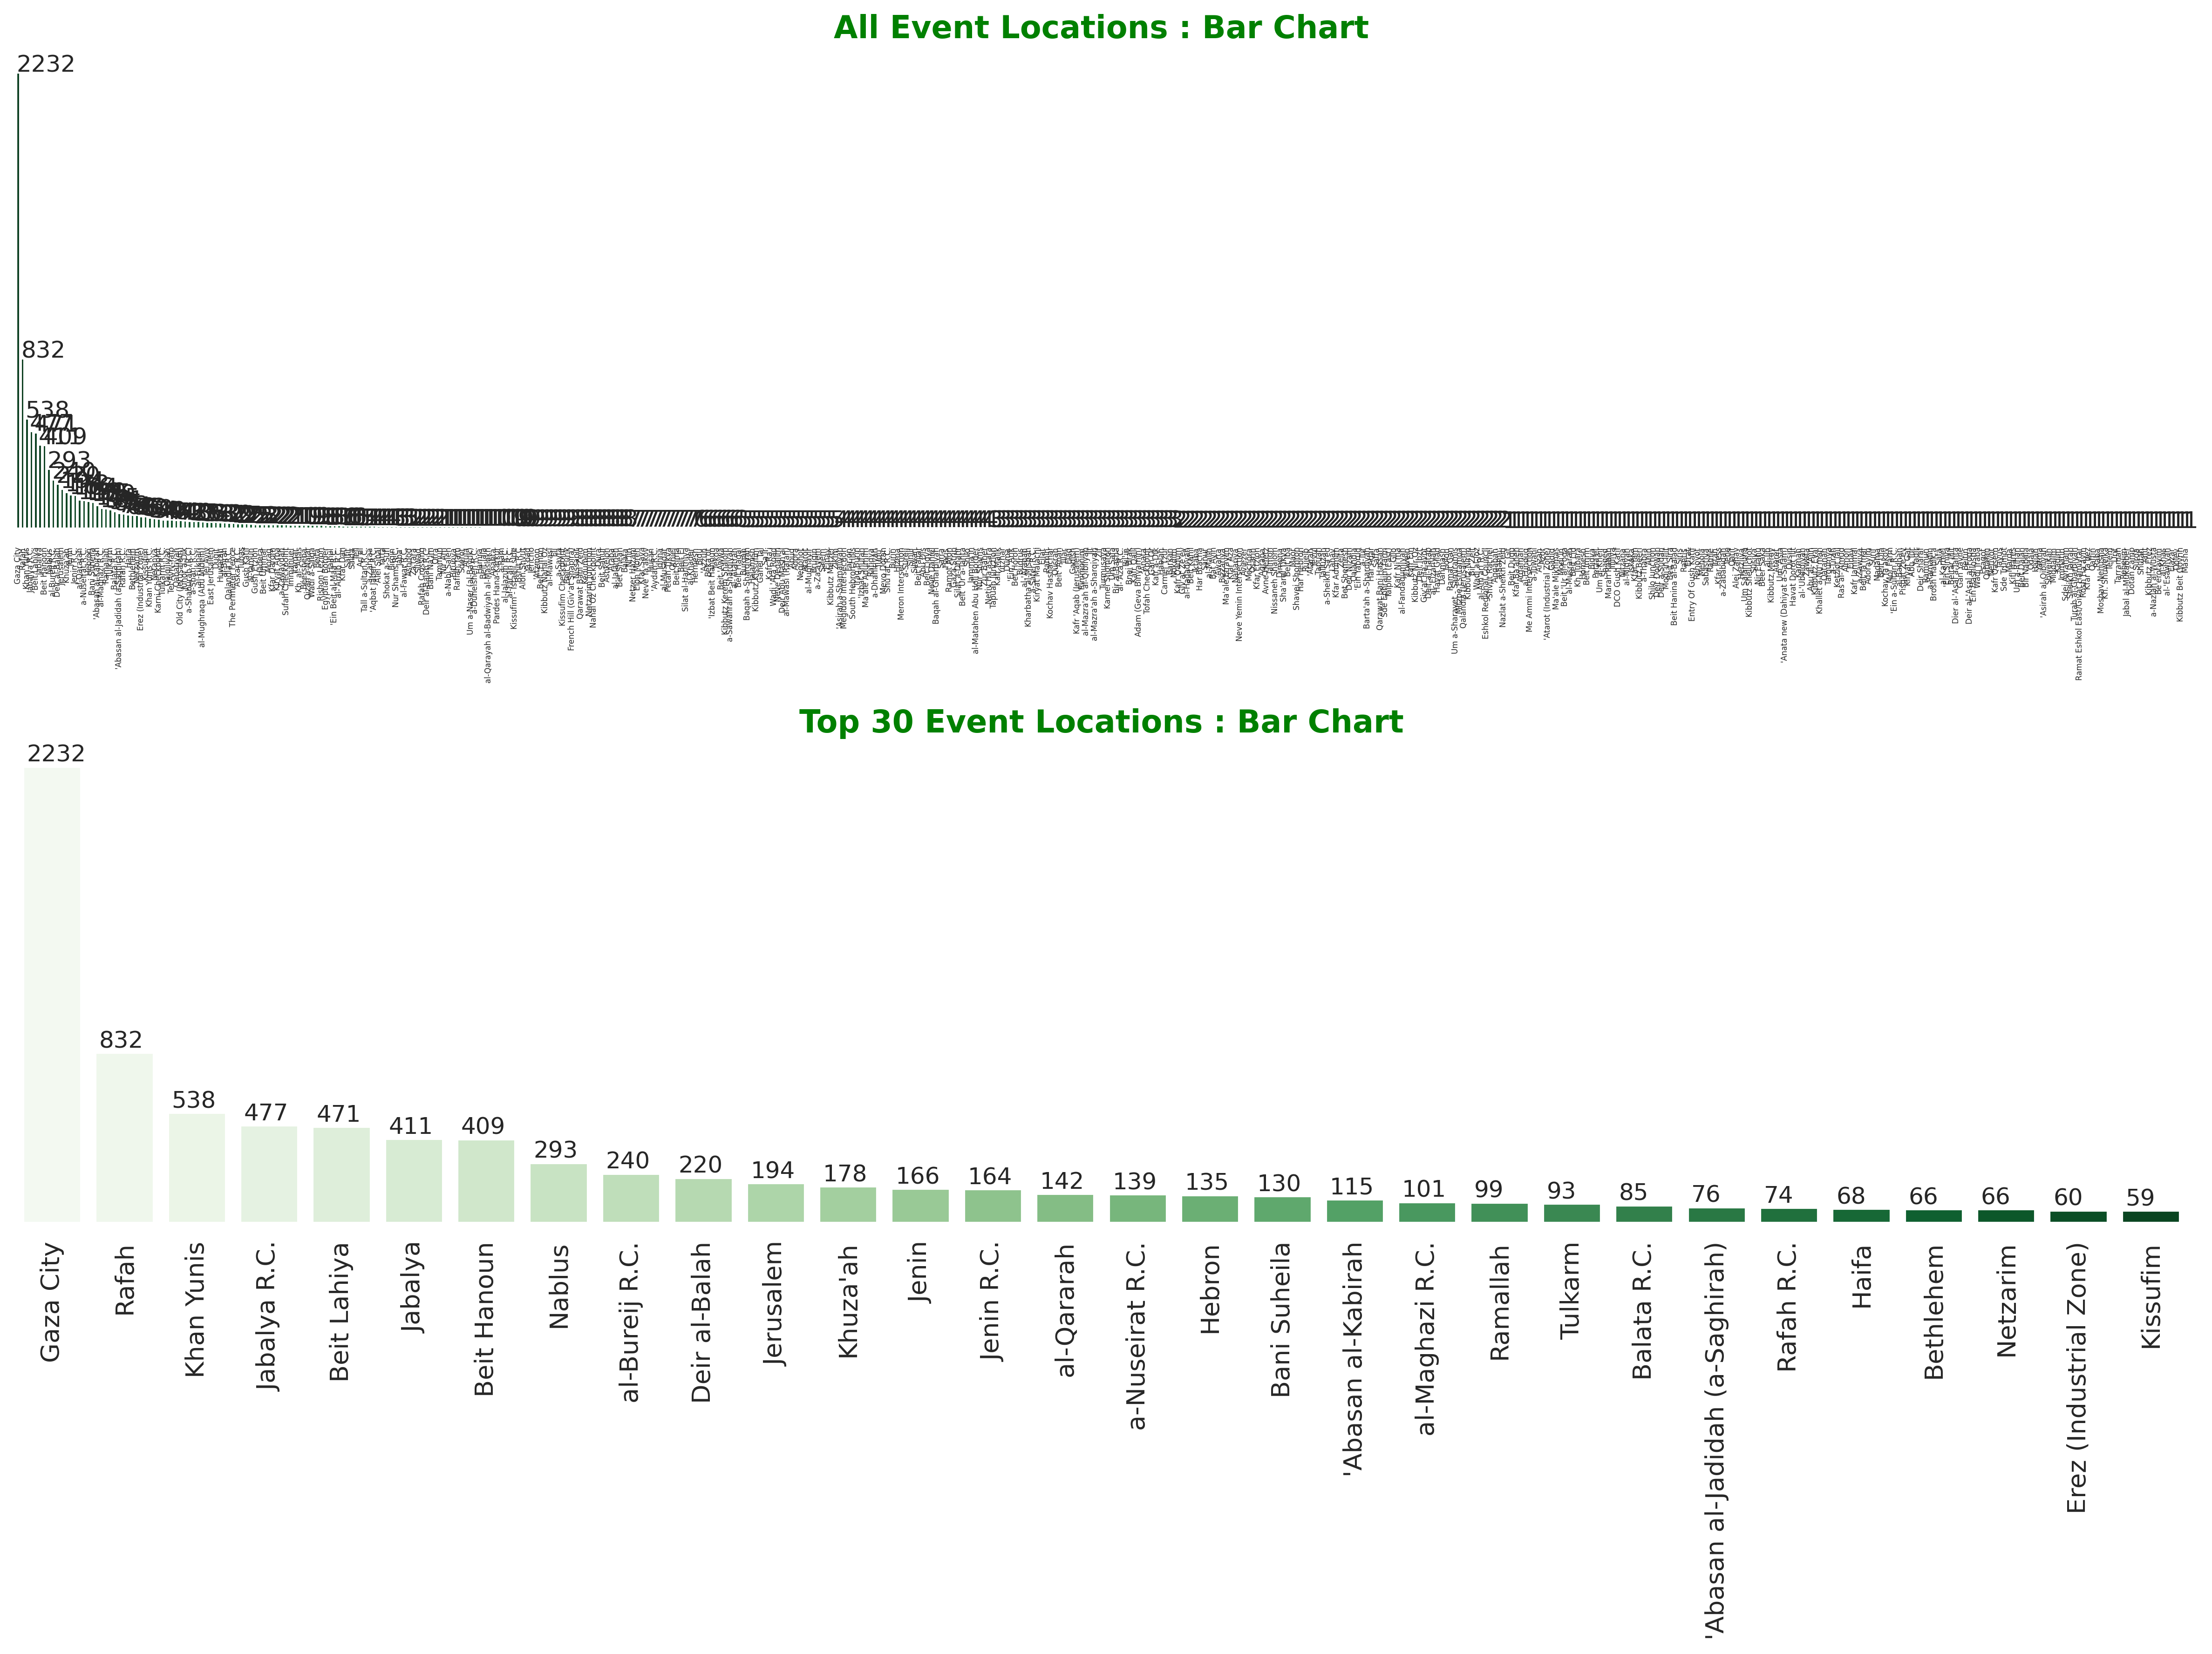

In [ ]:
## Analysis by Event Location

plt.subplots(figsize=(16,12))

plt.subplot(211)
plt.title('All Event Locations : Bar Chart', color='green', weight='bold', fontsize=16)
ax = sns.countplot(x=df['event_location'], palette='Greens_r', alpha=1, order=df['event_location'].value_counts().index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))
plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=4)

plt.subplot(212)
plt.title('Top 30 Event Locations : Bar Chart', color='green', weight='bold', fontsize=16)
ax = sns.countplot(x=df['event_location'], palette='Greens', alpha=1, order=df['event_location'].value_counts().head(30).index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+25))
plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

**Some Observations**

- Gaza city is the most affected Event location. Most number of fatalities have taken place there.
- Rafah, Khan Yunis, Jabalya R.C., and Beit Lahiya are other event locations.

In [ ]:
## Let's do fatalities analysis by Type of Injury, Ammunition, Killed By, Whether Took Part in Hostilities
## First we will check the segment count in each feature to streamline, if needed
print('\n', 'type_of_injury', '\n','-'*40,'\n', df['type_of_injury'].value_counts())
print('\n','ammunition','\n','-'*40,'\n', df['ammunition'].value_counts())
print('\n','killed_by','\n','-'*40,'\n', df['killed_by'].value_counts())
print('\n','took_part_in_the_hostilities','\n','-'*40,'\n', df['took_part_in_the_hostilities'].value_counts())


 type_of_injury 
 ---------------------------------------- 
 gunfire                         9843
explosion                        555
shelling                         311
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: type_of_injury, dtype: int64

 ammunition 
 ---------------------------------------- 
 missile                        2877
live ammunition                1514
shell                           675
explosive belt                  326
bomb                            249
mortar fire                      51
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phos

In [ ]:
## We will club the smaller segments in "type_of_injury" & "ammunition" varibles into a new "Others" segment
df['type_of_injury'].replace(['stabbing', 'house demolition','hit by a vehicle', 'beating', 'stones throwing', 'being bludgeoned with an axe', 'fire', 'physically assaulted', 'physical assault', 'Strangulation'], 'Other_Inju', inplace=True, regex=True)
df['type_of_injury'].replace(['gunOther_Inju'], 'gunfire', inplace=True, regex=True)
print('\n', 'Revised Type of Injury feature', '\n','-'*40,'\n', df['type_of_injury'].value_counts())

## Now we will check how these features have been transformed
df['ammunition'].replace(['mortar fire', 'knife', 'flechette shells', 'rubber-coated metal bullets', '0.22-caliber bullets', 'phosphorus shell', 'Qassam rocket', 'car bomb', 'teargas canister', 'rocket', 'grad rocket', 'sponge rounds', 'grenade', 'flare bomb', 'stun grenade', 'rock'], 'Other_Ammu', inplace=True, regex=True)
df['ammunition'].replace(['grad Other_Ammu', 'stun Other_Ammu'], 'Other_Ammu', inplace=True, regex=True)
print('\n', 'Revised Ammunition feature', '\n','-'*40, '\n', df['ammunition'].value_counts())


 Revised Type of Injury feature 
 ---------------------------------------- 
 gunfire       9843
explosion      555
shelling       311
Other_Inju     118
Name: type_of_injury, dtype: int64

 Revised Ammunition feature 
 ---------------------------------------- 
 missile            2877
live ammunition    1514
shell               675
explosive belt      326
bomb                249
Other_Ammu          230
Name: ammunition, dtype: int64


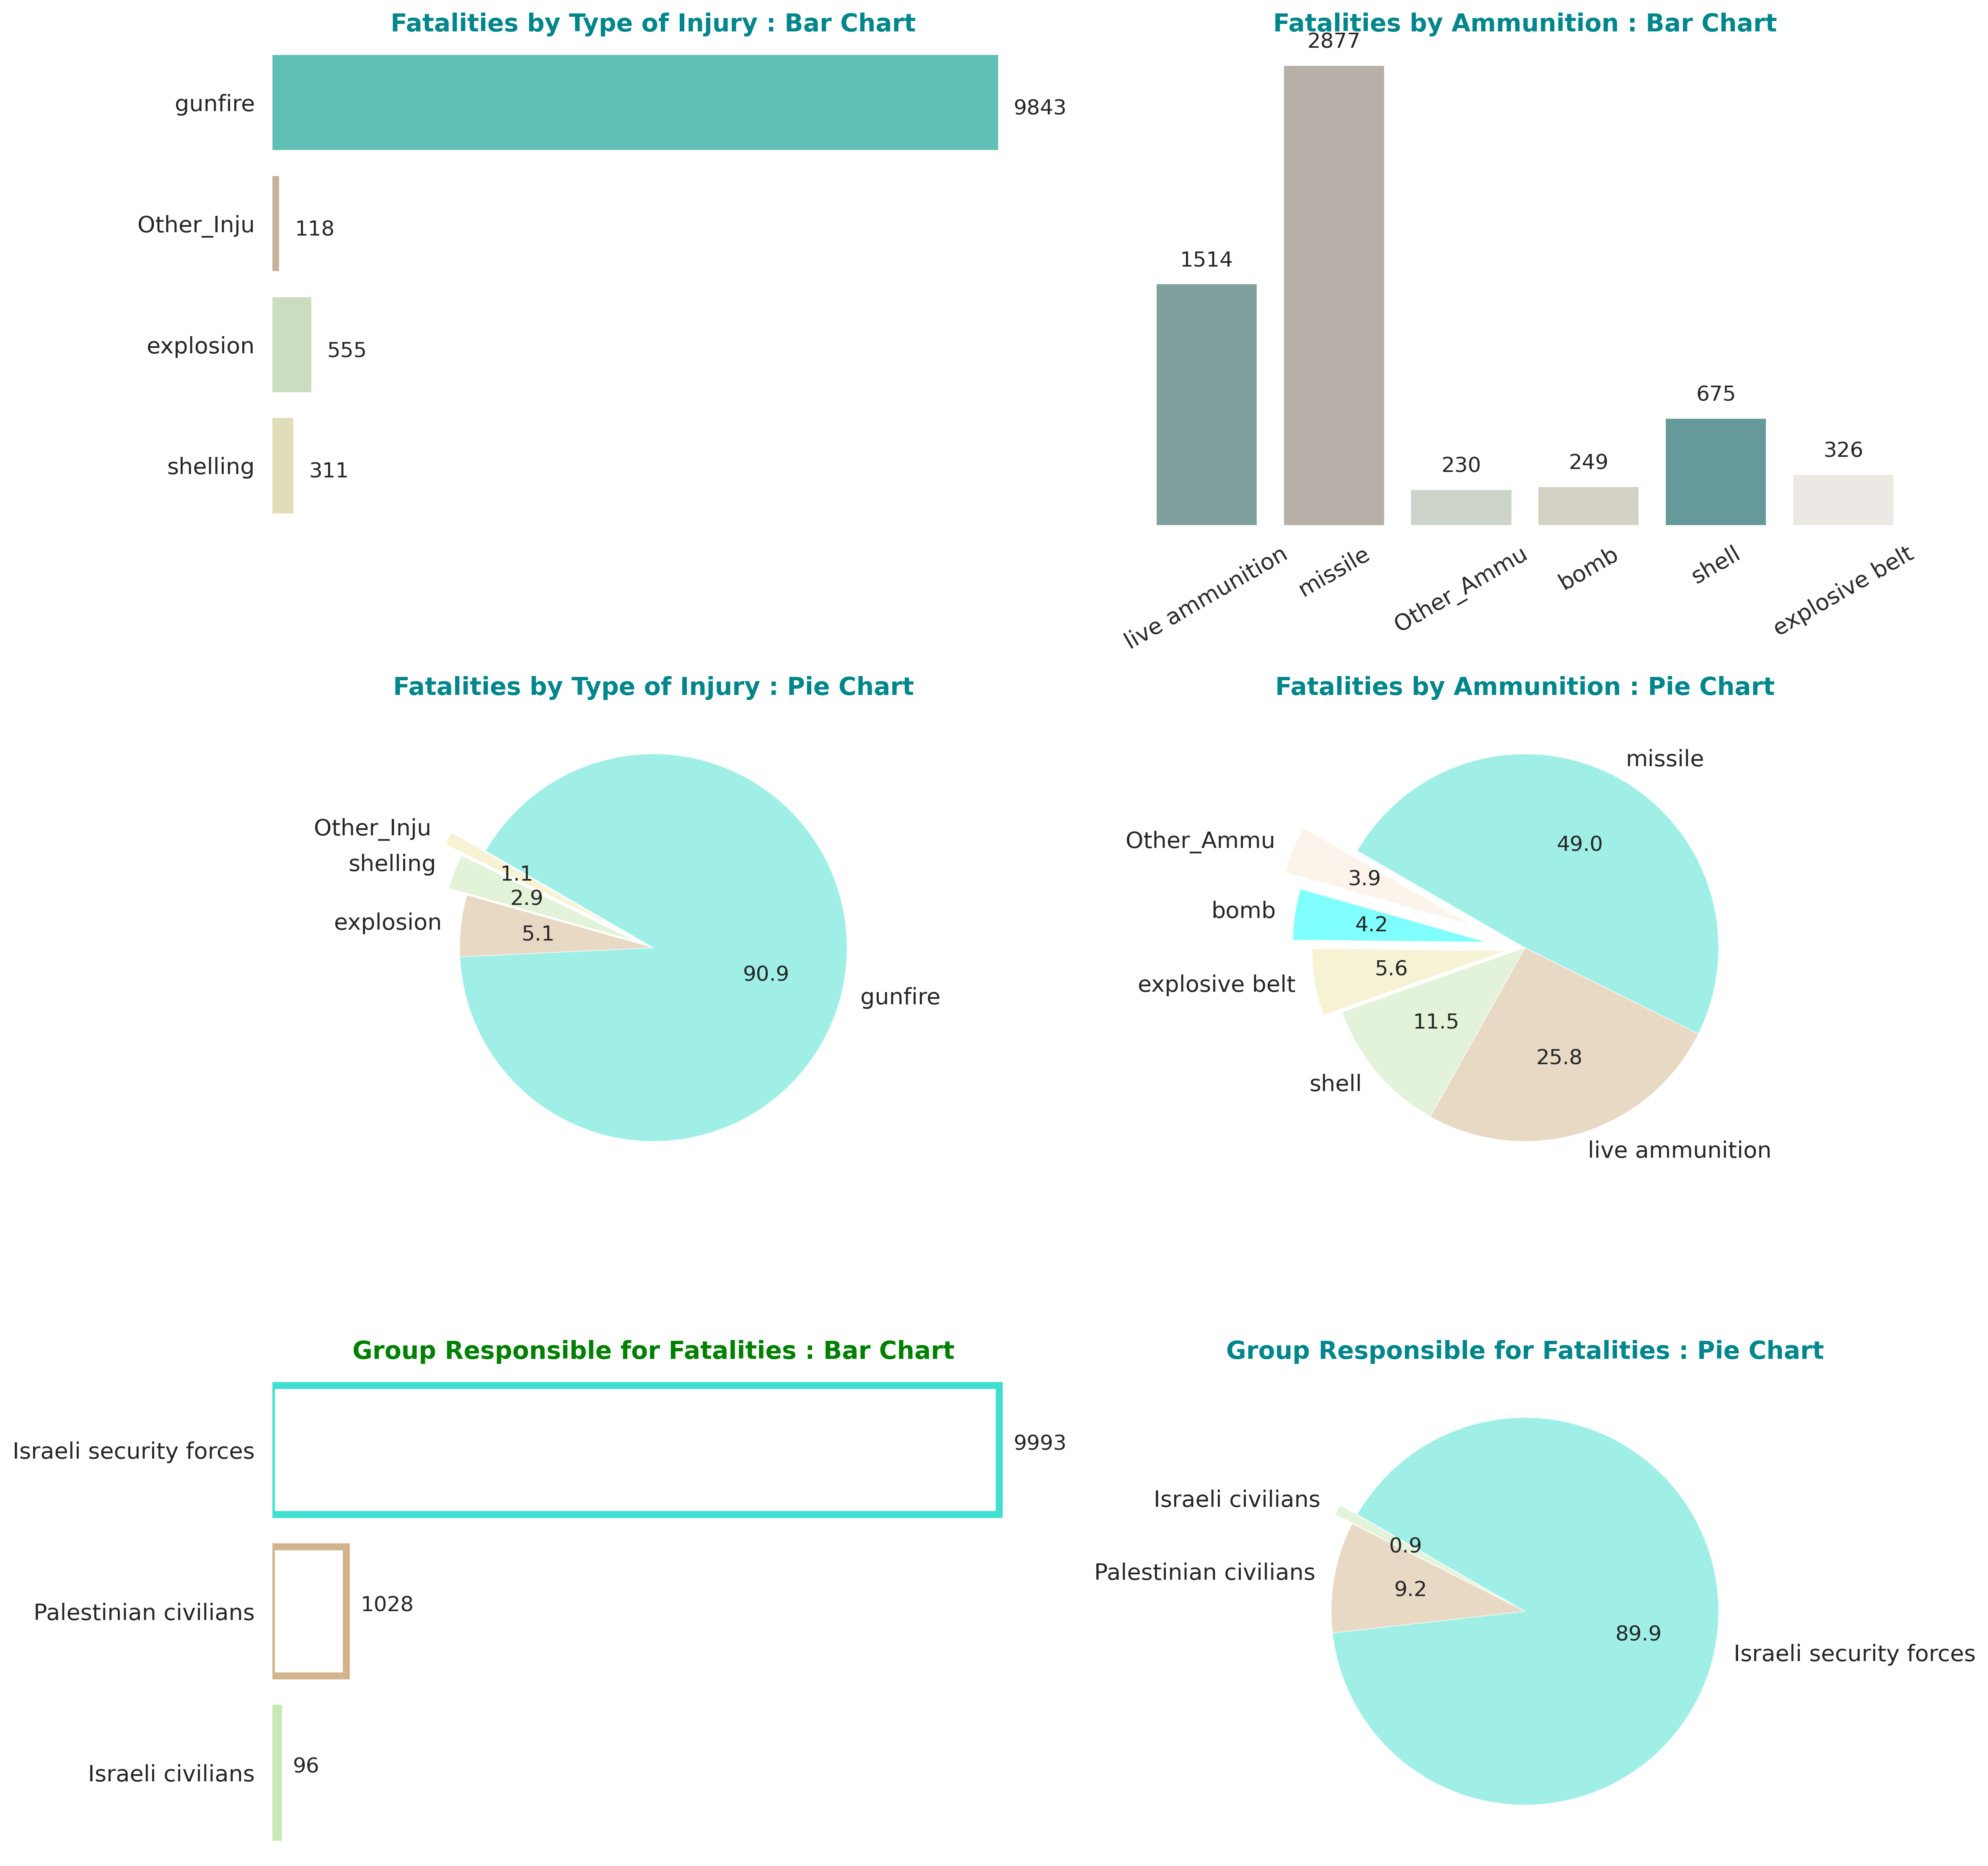

In [ ]:
## Univariate Analysis
## Type of Injury, Ammunition, Group Responsible for Fatalities

plt.subplots(figsize=(16,15))

plt.subplot(321)
plt.title('Fatalities by Type of Injury : Bar Chart', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(y=df['type_of_injury'], palette=my_col, saturation=0.6)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 200, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(322)
plt.title('Fatalities by Ammunition : Bar Chart', color='#00868B', weight='bold', fontsize=14)
ax = sns.countplot(x=df['ammunition'], palette=my_col, saturation=0.2)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 80), ha='center', va='bottom')
plt.xticks(rotation=30), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(323)
plt.title('Fatalities by Type of Injury : Pie Chart', color='#00868B', weight='bold', fontsize=14)
my_xpl = [0.0, 0.0, 0.1, 0.20]
df['type_of_injury'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.1f')

plt.subplot(324)
plt.title('Fatalities by Ammunition : Pie Chart', color='#00868B', weight='bold', fontsize=14)
my_xpl = [0.0, 0.0, 0.0, 0.1, 0.2, 0.3]
df['ammunition'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.1f')

plt.subplot(325)
plt.title('Group Responsible for Fatalities : Bar Chart', color='green', weight='bold', fontsize=14)
ax = sns.countplot(y=df['killed_by'], facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 20), order=df['killed_by'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 200, p.get_y()+0.4))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(326)
plt.title('Group Responsible for Fatalities : Pie Chart', color='#00868B', weight='bold', fontsize=14)
my_xpl = [0.0, 0.0, 0.1]
df['killed_by'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.1f')

plt.show()

**Some Observations**

- Gunfire is the cause of most number of fatalities.
- Missiles category is leading ammunition type, followed by live ammunition, and shelling.

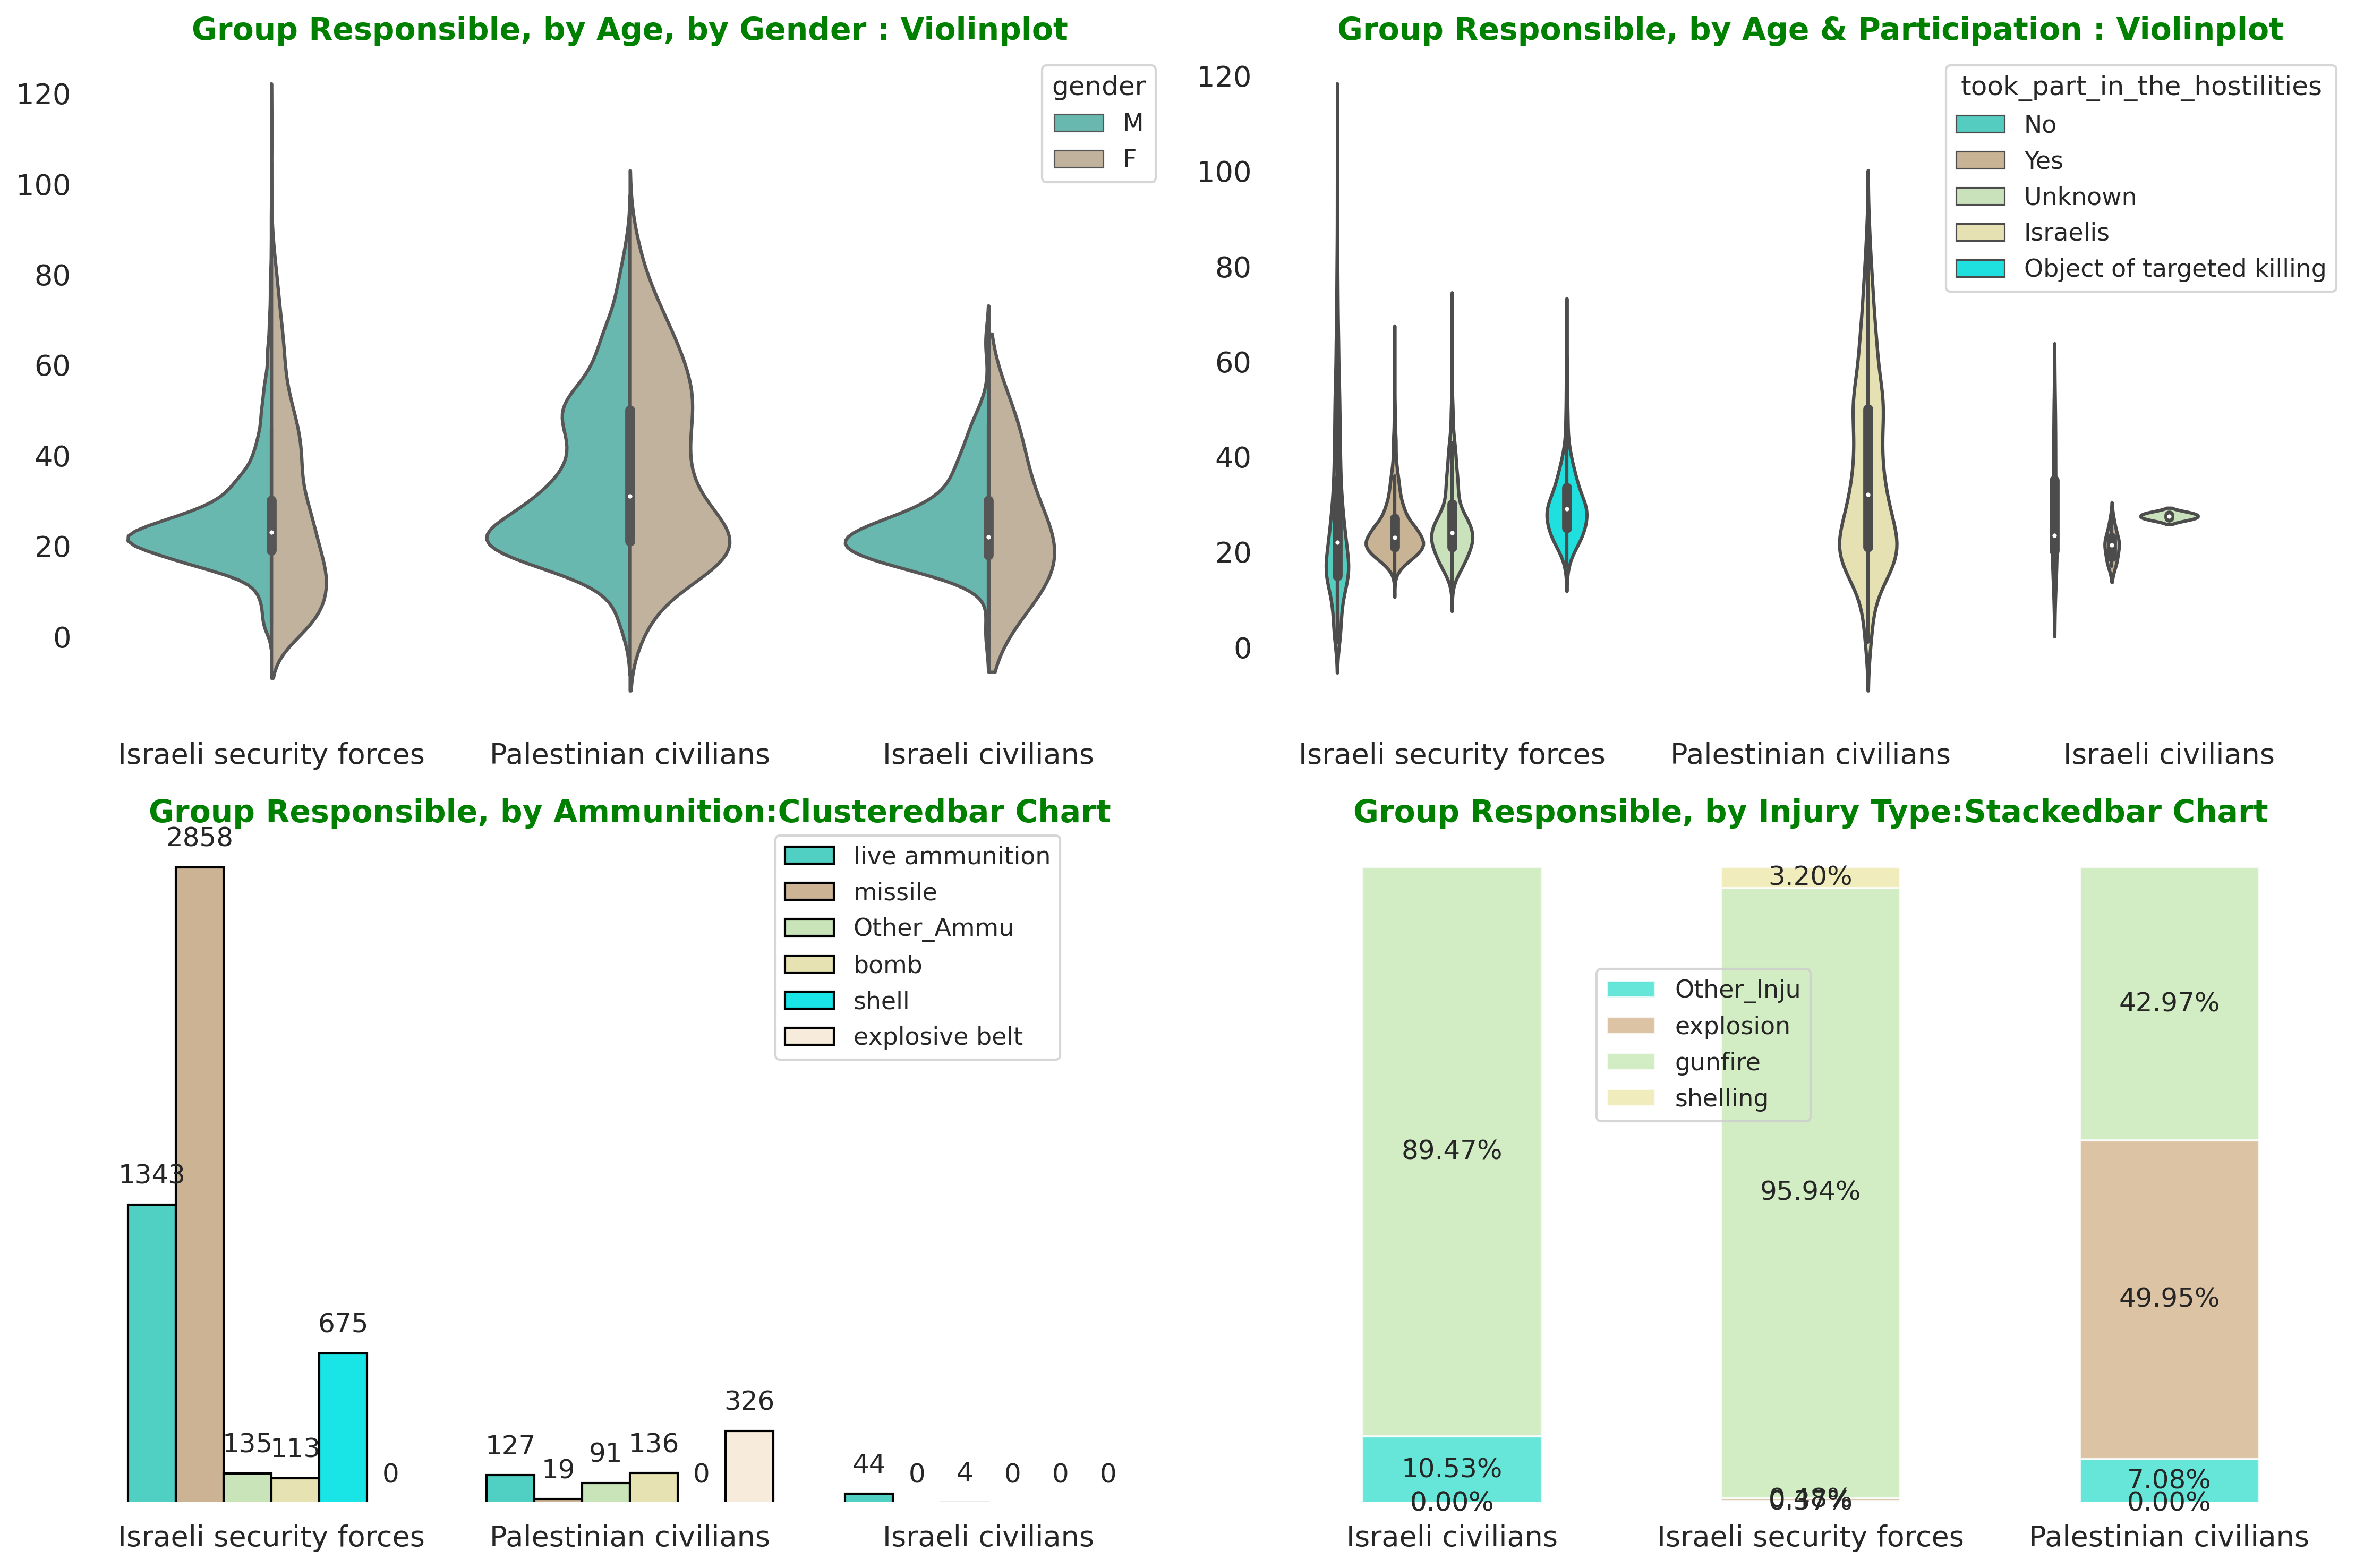

In [ ]:
## Multivariate Analysis
## Group Responsible for Fatalities, Age, Gender, Type of Injury, Ammunition, Participation

plt.subplots(figsize=(15,10))

plt.subplot(221)
plt.title('Group Responsible, by Age, by Gender : Violinplot', color='green', weight='bold', fontsize=14)
sns.violinplot(x=df['killed_by'], y=df['age'], hue=df['gender'], palette=my_col, split=True, gap=.1, saturation=0.5)

plt.xlabel(None), plt.ylabel(None)

plt.subplot(222)
plt.title('Group Responsible, by Age & Participation : Violinplot', color='green', weight='bold', fontsize=14)
sns.violinplot(x=df['killed_by'], y=df['age'], hue=df['took_part_in_the_hostilities'], palette=my_col)

plt.xlabel(None), plt.ylabel(None)

plt.subplot(223)
plt.title('Group Responsible, by Ammunition:Clusteredbar Chart', color='green', weight='bold', fontsize=14)
ax = sns.countplot(x=df['killed_by'], hue=df['ammunition'], palette=my_col, edgecolor = "black", saturation=0.8)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 70), ha='center', va='bottom')
ax.set_xlabel(None), ax.set_ylabel(None), ax.set_yticks([])
plt.legend(bbox_to_anchor=(0.9, 1), loc='best', borderaxespad=0)

ax = plt.subplot(224)
plt.title('Group Responsible, by Injury Type:Stackedbar Chart', color='green', weight='bold', fontsize=14)
ax = pd.crosstab(df['killed_by'], df['type_of_injury'], normalize = "index").plot.bar(stacked=True, color=my_col, alpha=0.8, ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.2%}', label_type='center')
ax.set_xlabel(None), ax.set_ylabel(None), ax.set_yticks([]), plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='best', borderaxespad=0)

plt.show()

**Some Observations**

 - A majority of Israeli civilians (89%) and Israeli security forces (96%) were killed by gunfire.
 - Whereas, narly 50% of Palestinian fatalities were due to explosion, and 43% were due to gunfire.

In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
from folium import plugins

In [ ]:
## Generate a heat map of event location districts with Folium library
## Define latitude and longitude for the Event location districts in our dataset
## Note: Collected the Lat-Long coordinates manually from website : https://www.gps-coordinates.net/

lat_longs = [
    [31.5050311,34.4641381], #Gaza
    [31.5501268,34.5033134], #North Gaza
    [31.3457612,34.3025277], #Khan Yunis
    [31.2752047,34.2558269], #Rafah
    [31.4183455,34.3502476], #Deir al-Balah
    [31.89096313966111,37.850288931736976], #Israel
    [32.2205316,35.2569374], #Nablus
    [32.4618837,35.297566], #Jenin
    [31.9106212,35.2088129], #Ramallah and al-Bira
    [31.5304303,35.0879406], #Hebron
    [32.3111468,35.0275505], #Tulkarm
    [31.7043556,35.2061876], #Bethlehem
    [31.78336,35.23388], #East Jerusalem
    [31.8912806,35.2003213], #al-Quds
    [31.42507,34.3734], #Gush Katif
    [32.18966,34.97063], #Qalqiliya
    [32.3234392,35.3693661], #Tubas
    [31.855991,35.4598851], #Jericho
    [32.0851611,35.1815442], #Salfit
]

## Setup event location district heat map with folium
event_location_district_heat_map = folium.Map(location= [31.90, 34.80], zoom_start=8)

## Add lat_longs data to folium event location district heat map
event_location_district_heat_map.add_child(plugins.HeatMap(lat_longs, min_opacity=0.6, radius=18))

## Display heat map
event_location_district_heat_map

- By looking at the heat map, you can figure out that Gaza (at the lower left corner) and West bank (on north eastern part of Israel) have highest number of events.

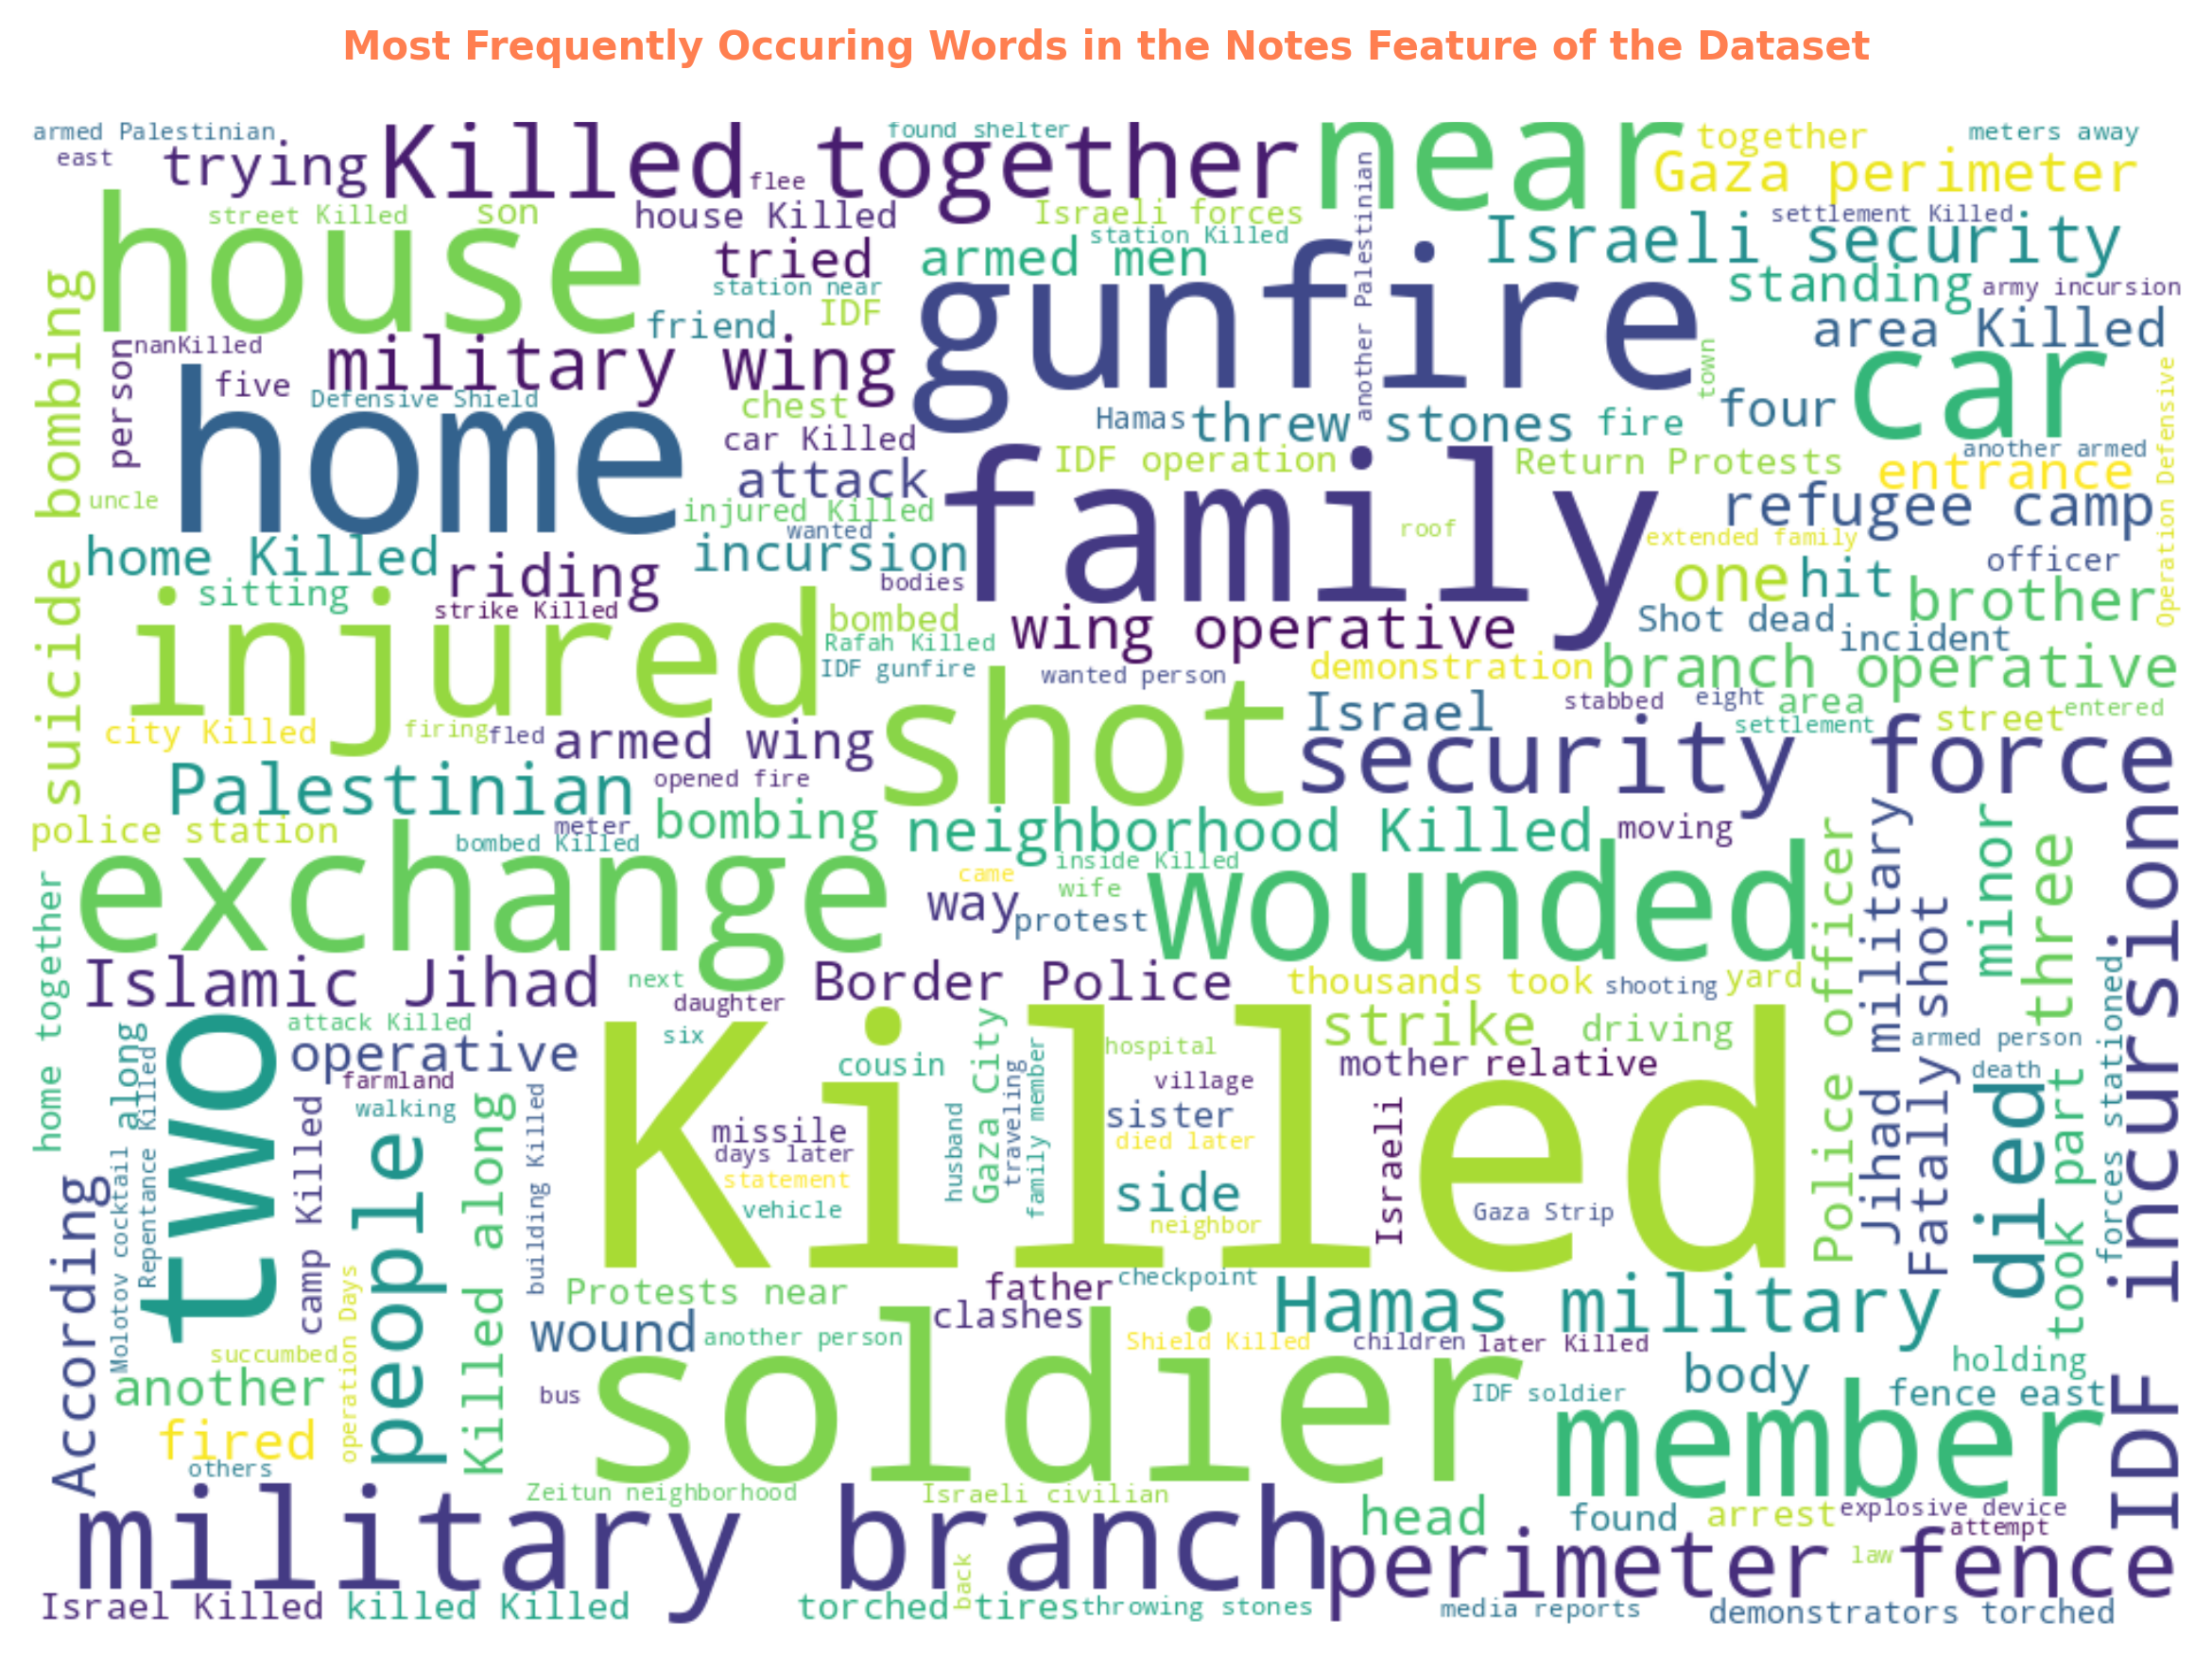

In [ ]:
## Let's take a look at Word Cloud plot of the "notes" feature (the last column)
## Word Cloud lets us know which words occured most number of times in a particular dataset

## Import WordCloud module from wordcloud library
from wordcloud import WordCloud

## Set comment words
cloud_of_words = ''.join(df['notes'].astype(str))

## Generate a Word Cloud
facecolor = 'white'
wordcloud = WordCloud(width=1000, height=700,background_color=facecolor,
            min_font_size=10, max_font_size=160).generate(cloud_of_words)

## Plot the World Cloud image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.title('Most Frequently Occuring Words in the Notes Feature of the Dataset', color='coral', weight='bold', fontsize=10, pad=15)
plt.show()

<p style="float:right; font-family:Calibri (Body); color:black; font-size:14px;" > <br>Here we conclude our notebook.... <br> <br>I hope you will find the notebook relevant and useful.... <br> <br>Please do share your opinions, thoughts and feedback (if any) in the comments section.... <br> <br><b>THANK YOU<b>...... <br>